 ## DISEASE PREDICTION 

## LOADING DATA AND PREPROCESSING
CB.EN.U4CSE21044-PICHERI LIKITHA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("dataset.csv")
data_severity = pd.read_csv("Symptom-severity.csv")
df.head()

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [3]:
data_severity.head()

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [4]:
for i in data_severity.index:
    print(data_severity['Symptom'][i], data_severity['weight'][i])

itching 1
skin_rash 3
nodal_skin_eruptions 4
continuous_sneezing 4
shivering 5
chills 3
joint_pain 3
stomach_pain 5
acidity 3
ulcers_on_tongue 4
muscle_wasting 3
vomiting 5
burning_micturition 6
spotting_urination 6
fatigue 4
weight_gain 3
anxiety 4
cold_hands_and_feets 5
mood_swings 3
weight_loss 3
restlessness 5
lethargy 2
patches_in_throat 6
irregular_sugar_level 5
cough 4
high_fever 7
sunken_eyes 3
breathlessness 4
sweating 3
dehydration 4
indigestion 5
headache 3
yellowish_skin 3
dark_urine 4
nausea 5
loss_of_appetite 4
pain_behind_the_eyes 4
back_pain 3
constipation 4
abdominal_pain 4
diarrhoea 6
mild_fever 5
yellow_urine 4
yellowing_of_eyes 4
acute_liver_failure 6
fluid_overload 6
swelling_of_stomach 7
swelled_lymph_nodes 6
malaise 6
blurred_and_distorted_vision 5
phlegm 5
throat_irritation 4
redness_of_eyes 5
sinus_pressure 4
runny_nose 5
congestion 5
chest_pain 7
weakness_in_limbs 7
fast_heart_rate 5
pain_during_bowel_movements 5
pain_in_anal_region 6
bloody_stool 5
irritation

In [5]:
data_dict=data_severity.set_index('Symptom').T.to_dict()
data_dict

{'itching': {'weight': 1},
 'skin_rash': {'weight': 3},
 'nodal_skin_eruptions': {'weight': 4},
 'continuous_sneezing': {'weight': 4},
 'shivering': {'weight': 5},
 'chills': {'weight': 3},
 'joint_pain': {'weight': 3},
 'stomach_pain': {'weight': 5},
 'acidity': {'weight': 3},
 'ulcers_on_tongue': {'weight': 4},
 'muscle_wasting': {'weight': 3},
 'vomiting': {'weight': 5},
 'burning_micturition': {'weight': 6},
 'spotting_urination': {'weight': 6},
 'fatigue': {'weight': 4},
 'weight_gain': {'weight': 3},
 'anxiety': {'weight': 4},
 'cold_hands_and_feets': {'weight': 5},
 'mood_swings': {'weight': 3},
 'weight_loss': {'weight': 3},
 'restlessness': {'weight': 5},
 'lethargy': {'weight': 2},
 'patches_in_throat': {'weight': 6},
 'irregular_sugar_level': {'weight': 5},
 'cough': {'weight': 4},
 'high_fever': {'weight': 7},
 'sunken_eyes': {'weight': 3},
 'breathlessness': {'weight': 4},
 'sweating': {'weight': 3},
 'dehydration': {'weight': 4},
 'indigestion': {'weight': 5},
 'headache'

In [6]:
df.shape

(4920, 18)

In [7]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [9]:
df.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

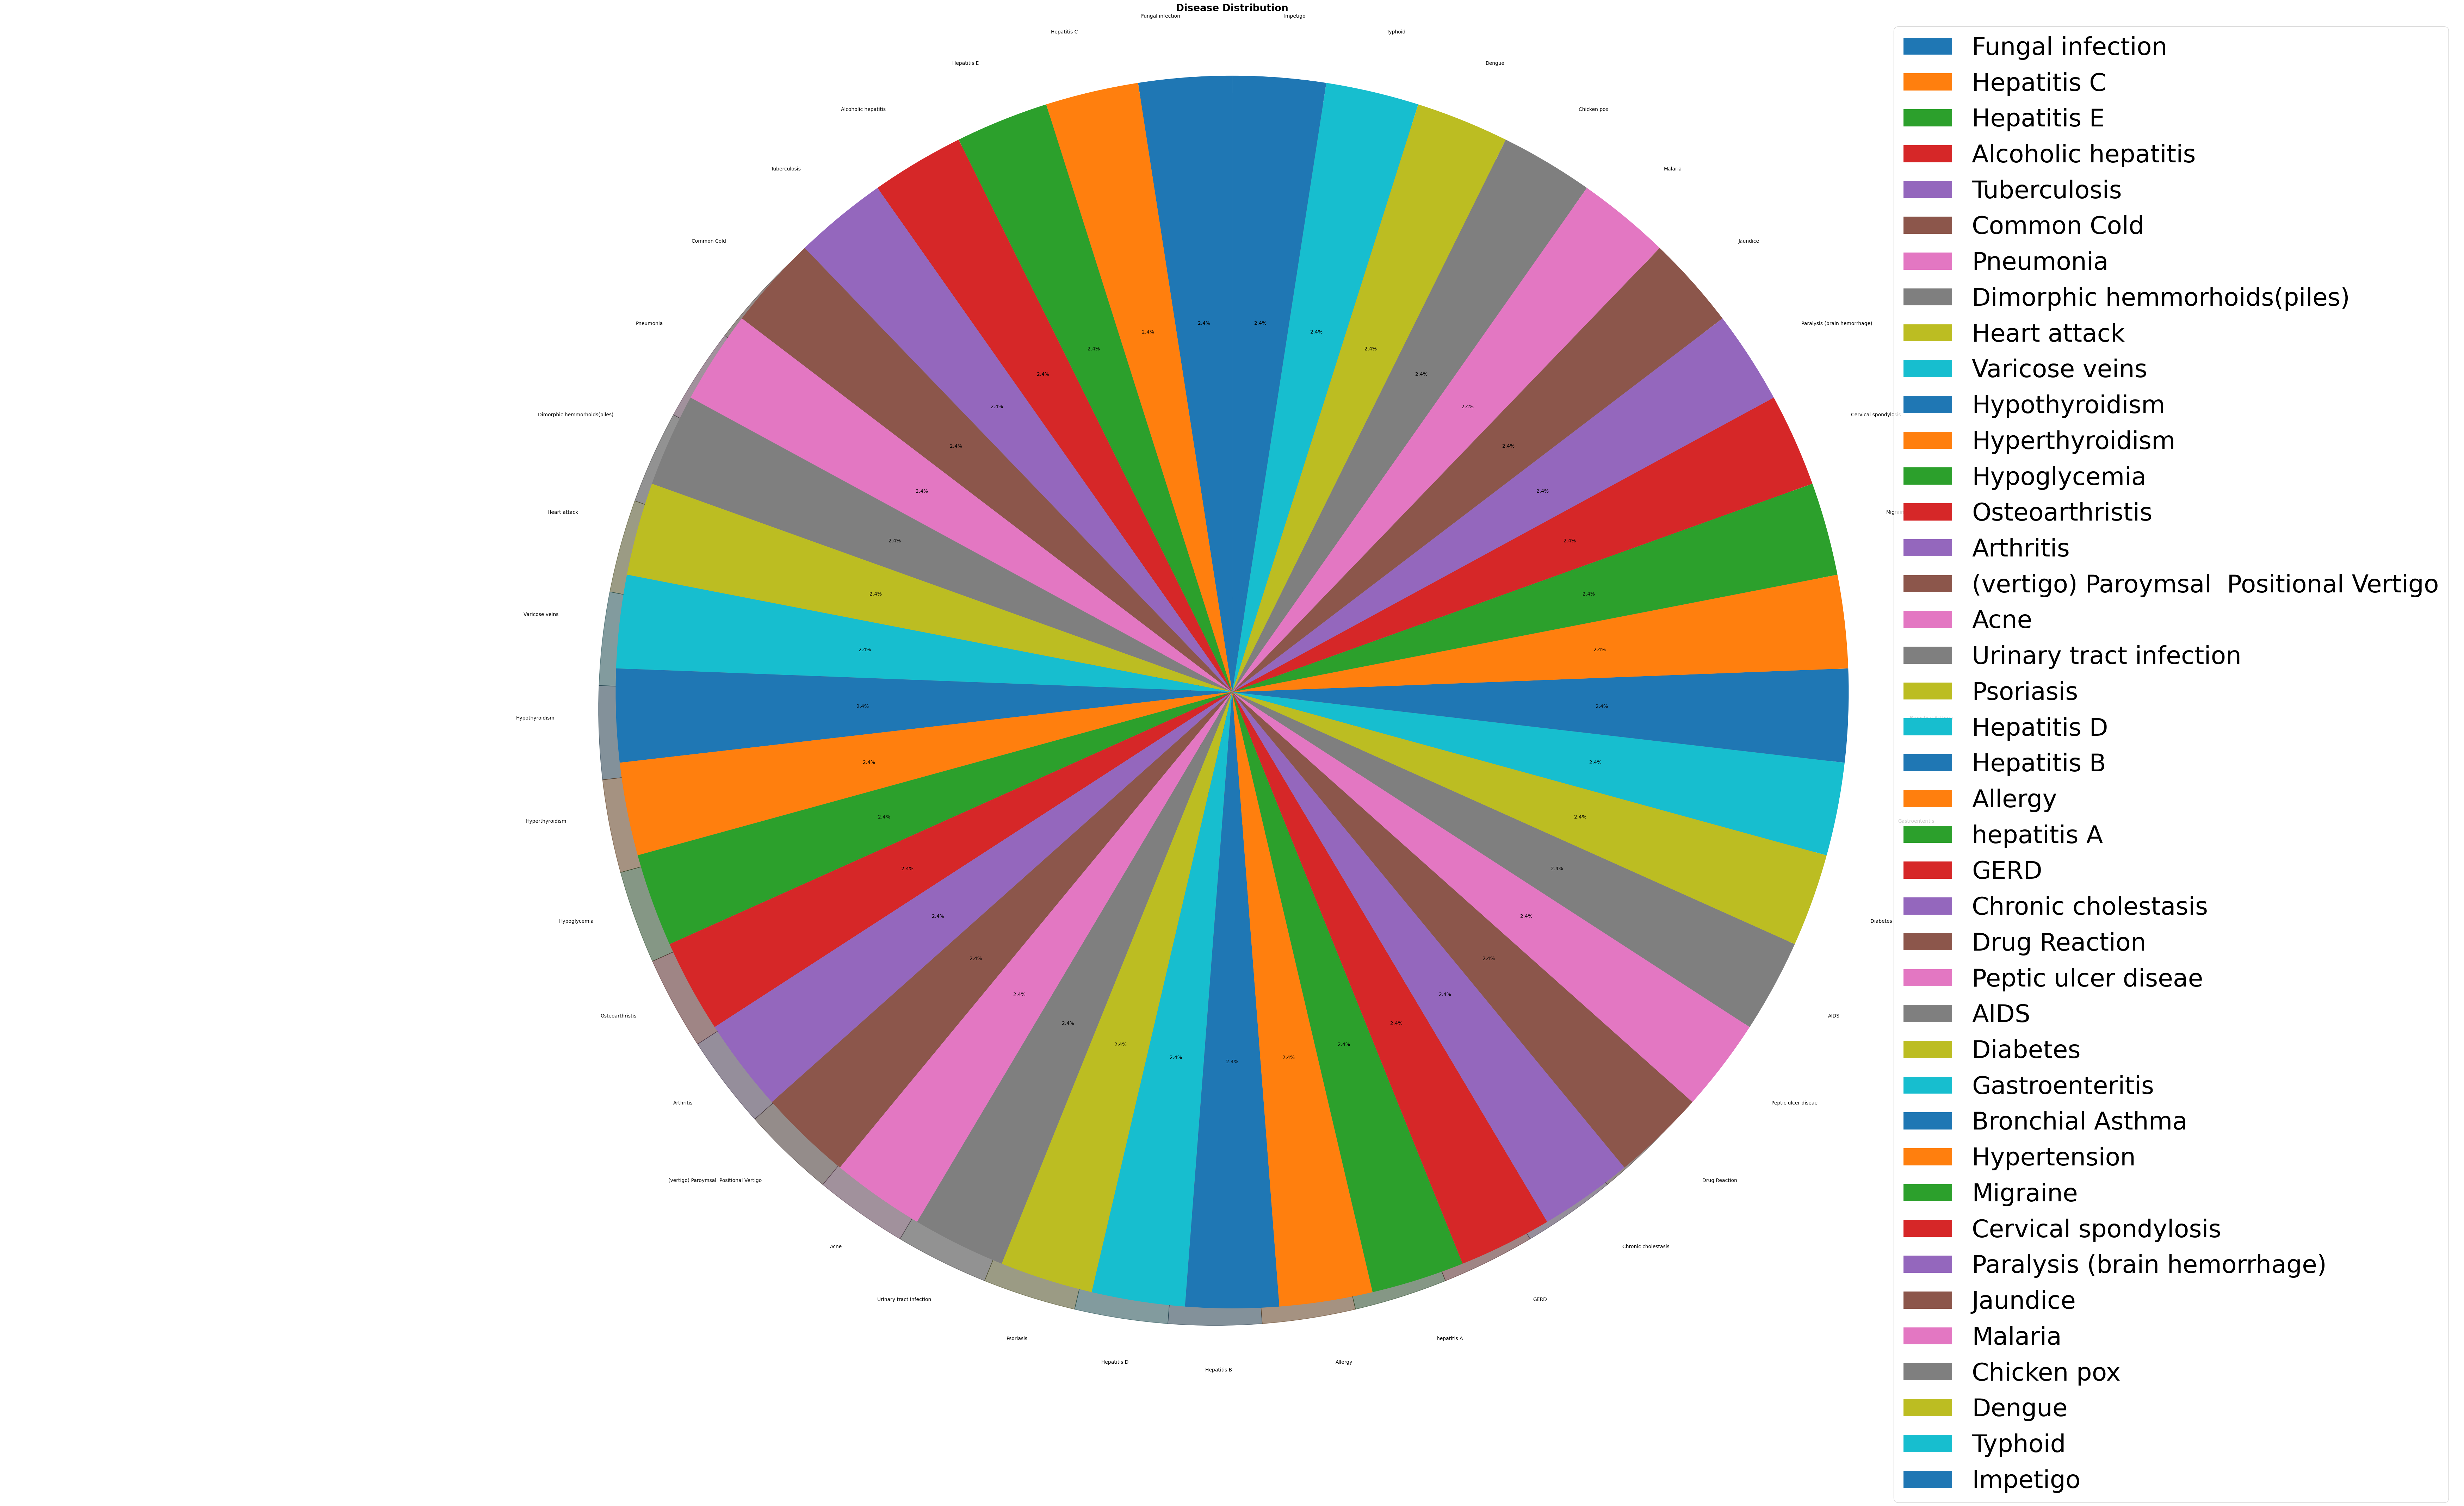

In [10]:
plt.figure(figsize=(90,50))
category = df['Disease'].value_counts()
plt.pie(category,labels=category.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Disease Distribution',fontsize=20,fontweight='bold')
plt.legend(category.index,loc='best',fontsize=50)
plt.axis('equal')
plt.show()

In [11]:
def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df

In [12]:
df=remove_space_between_words(df)
df.head()

Disease  Symptom_1             Symptom_2             Symptom_3  \
0  Fungal_infection    itching             skin_rash  nodal_skin_eruptions   
1  Fungal_infection  skin_rash  nodal_skin_eruptions   dischromic__patches   
2  Fungal_infection    itching  nodal_skin_eruptions   dischromic__patches   
3  Fungal_infection    itching             skin_rash   dischromic__patches   
4  Fungal_infection    itching             skin_rash  nodal_skin_eruptions   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic__patches       NaN       NaN       NaN       NaN       NaN   
1                  NaN       NaN       NaN       NaN       NaN       NaN   
2                  NaN       NaN       NaN       NaN       NaN       NaN   
3                  NaN       NaN       NaN       NaN       NaN       NaN   
4                  NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [13]:
df[df['Disease']=='Acne'].values

array([['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'pus_filled_pimples', 'blackheads', ..., nan, nan, nan],
       ...,
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan],
       ['Acne', 'skin_rash', 'pus_filled_pimples', ..., nan, nan, nan]],
      dtype=object)

In [14]:
def encode_symptoms(df, data_severity):
    for i in data_severity.index:
        symptom = data_severity["Symptom"][i]
        weight = data_severity["weight"][i]
        df = df.replace(symptom, weight)

    # Replace missing values with 0
    df = df.fillna(0)

    # Additional hardcoded replacements
    df = df.replace("foul_smell_of_urine", 5)
    df = df.replace("dischromic__patches", 6)
    df = df.replace("spotting__urination", 6)
    
    return df

In [15]:
new_df = encode_symptoms(df, data_severity)

In [16]:
new_df.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  \
0  Fungal_infection          1          3          4          6          0   
1  Fungal_infection          3          4          6          0          0   
2  Fungal_infection          1          4          6          0          0   
3  Fungal_infection          1          3          6          0          0   
4  Fungal_infection          1          3          4          0          0   

   Symptom_6  Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  \
0        0.0        0.0        0.0        0.0         0.0         0.0   
1        0.0        0.0        0.0        0.0         0.0         0.0   
2        0.0        0.0        0.0        0.0         0.0         0.0   
3        0.0        0.0        0.0        0.0         0.0         0.0   
4        0.0        0.0        0.0        0.0         0.0         0.0   

   Symptom_12  Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         0.0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0         0.0

In [17]:
lb=LabelEncoder()
new_df['Disease']=lb.fit_transform(new_df['Disease'])
new_df.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15          1          3          4          6          0        0.0   
1       15          3          4          6          0          0        0.0   
2       15          1          4          6          0          0        0.0   
3       15          1          3          6          0          0        0.0   
4       15          1          3          4          0          0        0.0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0        0.0        0.0        0.0         0.0         0.0         0.0   
1        0.0        0.0        0.0         0.0         0.0         0.0   
2        0.0        0.0        0.0         0.0         0.0         0.0   
3        0.0        0.0        0.0         0.0         0.0         0.0   
4        0.0        0.0        0.0         0.0         0.0         0.0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0

In [18]:
names = []

# Iterate through columns except for "Disease"
for col in new_df.columns:
    if col != "Disease":
        # Iterate through rows in the column
        for symptom in new_df[col]:
            # Check if the value is a string and not in the 'names' list
            if isinstance(symptom, str) and symptom not in names:
                names.append(symptom)

# Check if all symptoms have been replaced
all_replaced = all(symptom not in names for symptom in data_severity["Symptom"])

if all_replaced:
    print("All symptoms have been replaced.")
else:
    print("The following symptoms were not replaced:", names)

All symptoms have been replaced.


In [19]:
df=new_df
df.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15          1          3          4          6          0        0.0   
1       15          3          4          6          0          0        0.0   
2       15          1          4          6          0          0        0.0   
3       15          1          3          6          0          0        0.0   
4       15          1          3          4          0          0        0.0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0        0.0        0.0        0.0         0.0         0.0         0.0   
1        0.0        0.0        0.0         0.0         0.0         0.0   
2        0.0        0.0        0.0         0.0         0.0         0.0   
3        0.0        0.0        0.0         0.0         0.0         0.0   
4        0.0        0.0        0.0         0.0         0.0         0.0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0

In [20]:
y=df['Disease']

In [21]:
df.isnull().sum()

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [22]:
df.describe()

Disease    Symptom_1    Symptom_2    Symptom_3    Symptom_4  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean     20.000000     3.410976     4.165854     4.173171     3.967073   
std      11.833362     1.316310     1.207541     1.249229     1.855343   
min       0.000000     1.000000     2.000000     2.000000     0.000000   
25%      10.000000     3.000000     3.000000     3.000000     3.000000   
50%      20.000000     3.000000     4.000000     4.000000     4.000000   
75%      30.000000     4.000000     5.000000     5.000000     5.000000   
max      40.000000     7.000000     7.000000     7.000000     7.000000   

         Symptom_5    Symptom_6    Symptom_7    Symptom_8    Symptom_9  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean      3.195122     2.654878     2.059756     1.712195     1.554878   
std       2.163883     2.384472     2.340259     2.244483     2.250034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     0.000000   
50%       4.000000     3.000000     0.000000     0.000000     0.000000   
75%       5.000000     5.000000     4.000000     4.000000     4.000000   
max       7.000000     7.000000     6.000000     7.000000     7.000000   

        Symptom_10   Symptom_11   Symptom_12   Symptom_13   Symptom_14  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean      1.304878     0.979268     0.702439     0.492683     0.323171   
std       2.061402     1.880334     1.799707     1.529126     1.305543   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       3.000000     0.000000     0.000000     0.000000     0.000000   
max       6.000000     7.000000     7.000000     6.000000     7.000000   

        Symptom_15   Symptom_16   Symptom_17  
count  4920.000000  4920.000000  4920.000000  
mean      0.282927     0.136585     0.029268  
std       1.298518     0.719747     0.240191  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       7.000000     5.000000     2.000000

In [23]:
df['Disease'].value_counts()

Disease
15    120
20    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
21    120
19    120
4     120
40    120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
27    120
Name: count, dtype: int64

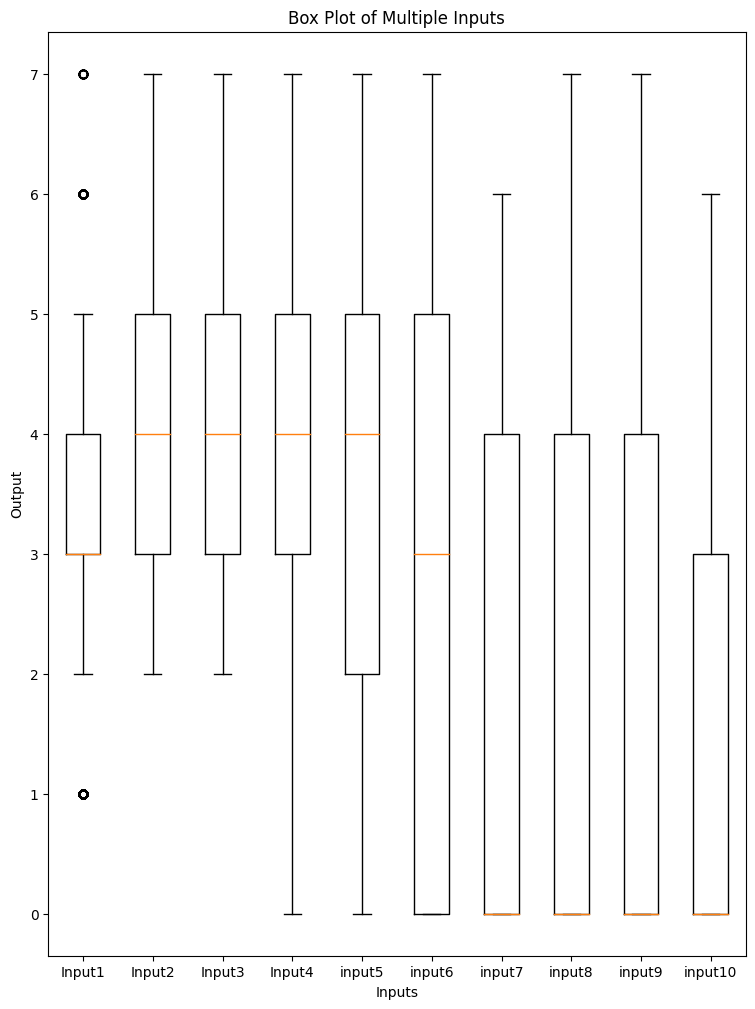

In [24]:
import matplotlib.pyplot as plt

# Sample data (replace with your data)
input_data = [df['Symptom_1'],df['Symptom_2'],df['Symptom_3'],df['Symptom_4'],df['Symptom_5'],df['Symptom_6'],df['Symptom_7'],
              df['Symptom_8'],df['Symptom_9'],df['Symptom_10']]  # List of input data (lists or arrays)
output_data = df['Disease']  # Output data (single list or array)

# Create a box plot
plt.figure(figsize=(9, 12))
plt.boxplot(input_data, labels=['Input1', 'Input2', 'Input3', 'Input4','input5','input6','input7','input8','input9','input10'
                                ])
plt.title('Box Plot of Multiple Inputs')
plt.xlabel('Inputs')
plt.ylabel('Output')
plt.show()


In [25]:
z=y.drop_duplicates() # total no of diseases
z
z.count()

41

In [26]:
df.describe()

Disease    Symptom_1    Symptom_2    Symptom_3    Symptom_4  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean     20.000000     3.410976     4.165854     4.173171     3.967073   
std      11.833362     1.316310     1.207541     1.249229     1.855343   
min       0.000000     1.000000     2.000000     2.000000     0.000000   
25%      10.000000     3.000000     3.000000     3.000000     3.000000   
50%      20.000000     3.000000     4.000000     4.000000     4.000000   
75%      30.000000     4.000000     5.000000     5.000000     5.000000   
max      40.000000     7.000000     7.000000     7.000000     7.000000   

         Symptom_5    Symptom_6    Symptom_7    Symptom_8    Symptom_9  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean      3.195122     2.654878     2.059756     1.712195     1.554878   
std       2.163883     2.384472     2.340259     2.244483     2.250034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     0.000000   
50%       4.000000     3.000000     0.000000     0.000000     0.000000   
75%       5.000000     5.000000     4.000000     4.000000     4.000000   
max       7.000000     7.000000     6.000000     7.000000     7.000000   

        Symptom_10   Symptom_11   Symptom_12   Symptom_13   Symptom_14  \
count  4920.000000  4920.000000  4920.000000  4920.000000  4920.000000   
mean      1.304878     0.979268     0.702439     0.492683     0.323171   
std       2.061402     1.880334     1.799707     1.529126     1.305543   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       3.000000     0.000000     0.000000     0.000000     0.000000   
max       6.000000     7.000000     7.000000     6.000000     7.000000   

        Symptom_15   Symptom_16   Symptom_17  
count  4920.000000  4920.000000  4920.000000  
mean      0.282927     0.136585     0.029268  
std       1.298518     0.719747     0.240191  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       7.000000     5.000000     2.000000

In [27]:
x=df.drop('Disease',axis=1)
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3444, 17), (1476, 17), (3444,), (1476,))

In [28]:
x_train.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
682           3          4          4          7          4        3.0   
3963          3          4          4          7          4        3.0   
3126          3          7          4          4          3        0.0   
4480          3          5          3          5          4        4.0   
3411          5          3          4          6          0        0.0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
682         6.0        5.0        7.0         5.0         4.0         0.0   
3963        6.0        5.0        7.0         5.0         4.0         0.0   
3126        0.0        0.0        0.0         0.0         0.0         0.0   
4480        3.0        2.0        3.0         0.0         0.0         0.0   
3411        0.0        0.0        0.0         0.0         0.0         0.0   

      Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
682          0.0         0.0         0.0         0.0         0.0  
3963         0.0         0.0         0.0         0.0         0.0  
3126         0.0         0.0         0.0         0.0         0.0  
4480         0.0         0.0         0.0         0.0         0.0  
3411         0.0         0.0         0.0         0.0         0.0

In [29]:
x.head()

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0          1          3          4          6          0        0.0   
1          3          4          6          0          0        0.0   
2          1          4          6          0          0        0.0   
3          1          3          6          0          0        0.0   
4          1          3          4          0          0        0.0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0        0.0        0.0        0.0         0.0         0.0         0.0   
1        0.0        0.0        0.0         0.0         0.0         0.0   
2        0.0        0.0        0.0         0.0         0.0         0.0   
3        0.0        0.0        0.0         0.0         0.0         0.0   
4        0.0        0.0        0.0         0.0         0.0         0.0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0

In [30]:
y.head()

0    15
1    15
2    15
3    15
4    15
Name: Disease, dtype: int32

## FEATURE SELECTION


In [31]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores.nlargest(10,'Score')
#print them
print(featureScores.nlargest(10,'Score'))



         Specs         Score
14  Symptom_15  27279.724138
13  Symptom_14  24403.381132
11  Symptom_12  20501.666667
12  Symptom_13  19019.405941
8    Symptom_9  15300.160000
9   Symptom_10  14630.702804
10  Symptom_11  14549.828144
7    Symptom_8  13816.923077
15  Symptom_16  13174.285714
6    Symptom_7  11454.429840


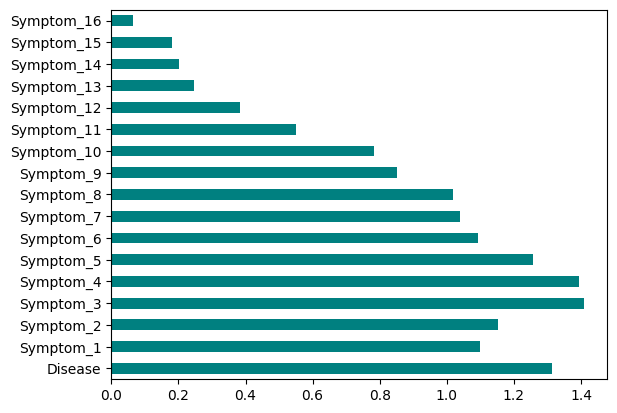

In [32]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
mutual_info=mutual_info_classif(x,y)
feat_importances=pd.Series(mutual_info,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [33]:
# chi square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_cat=x.astype(int)
chi2_features=SelectKBest(chi2,k=3)
x_kbest_features=chi2_features.fit_transform(x_cat,y)
print('Original feature number:',x_cat.shape[1])
print('Reduced feature number:',x_kbest_features.shape[1])

Original feature number: 17
Reduced feature number: 3


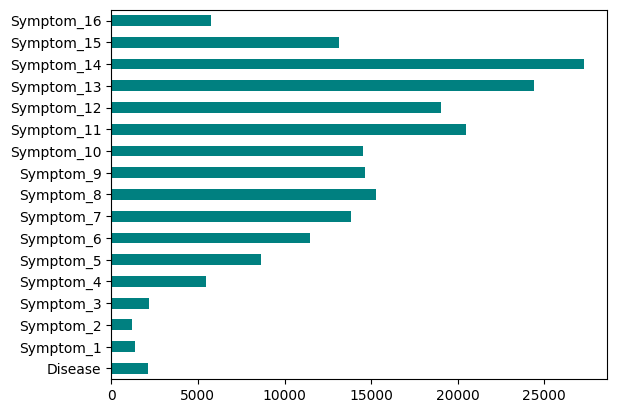

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # Fisher score method in scikit-learn

# Assuming x_cat and y are your feature matrix and target variable

# Create an instance of SelectKBest with the Fisher score (chi-squared) method
selector = SelectKBest(score_func=chi2, k='all')

# Fit the selector to your data
X_new = selector.fit_transform(x_cat, y)

# Get the scores of each feature
scores = selector.scores_

# Create a pandas Series for feature importances
feat_importances = pd.Series(scores, index=df.columns[0:len(df.columns)-1])

# Plot the feature importances
feat_importances.plot(kind='barh', color='teal')
plt.show()


In [35]:
# variance threashold
from sklearn.feature_selection import VarianceThreshold
var_threashold=VarianceThreshold(threshold=0)
var_threashold.fit(x_cat)
var_threashold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

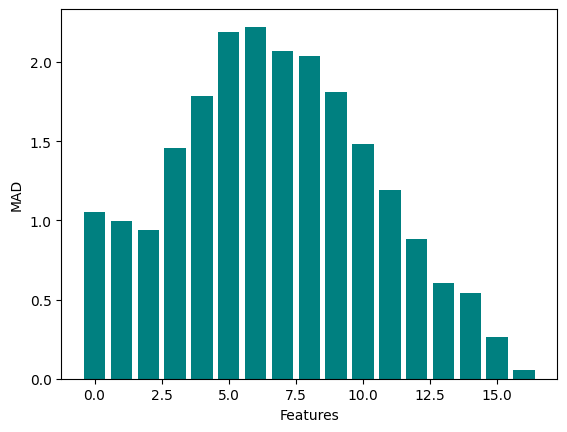

In [36]:
#calculate mad
from sklearn.metrics import median_absolute_error
mean_abs_diff=np.sum(np.abs(x-np.mean(x,axis=0)),axis=0)/x.shape[0]
plt.bar(np.arange(x.shape[1]),mean_abs_diff,color='teal')
plt.xlabel('Features')
plt.ylabel('MAD')
plt.show()

In [37]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [39]:
standardized_data = scaler.transform(x)
standardized_data

array([[-1.83180372, -0.96557578, -0.13863618, ..., -0.21790657,
        -0.18978799, -0.12186667],
       [-0.3122498 , -0.13736225,  1.46251409, ..., -0.21790657,
        -0.18978799, -0.12186667],
       [-1.83180372, -0.13736225,  1.46251409, ..., -0.21790657,
        -0.18978799, -0.12186667],
       ...,
       [ 1.96708109, -0.13736225,  0.66193895, ..., -0.21790657,
        -0.18978799, -0.12186667],
       [-0.3122498 , -0.96557578, -0.93921132, ..., -0.21790657,
        -0.18978799, -0.12186667],
       [-0.3122498 ,  2.34727837, -0.13863618, ..., -0.21790657,
        -0.18978799, -0.12186667]])

In [40]:
"""x=df.drop('Disease',axis=1)
y=df['Disease']"""
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3444, 17), (1476, 17), (3444,), (1476,))

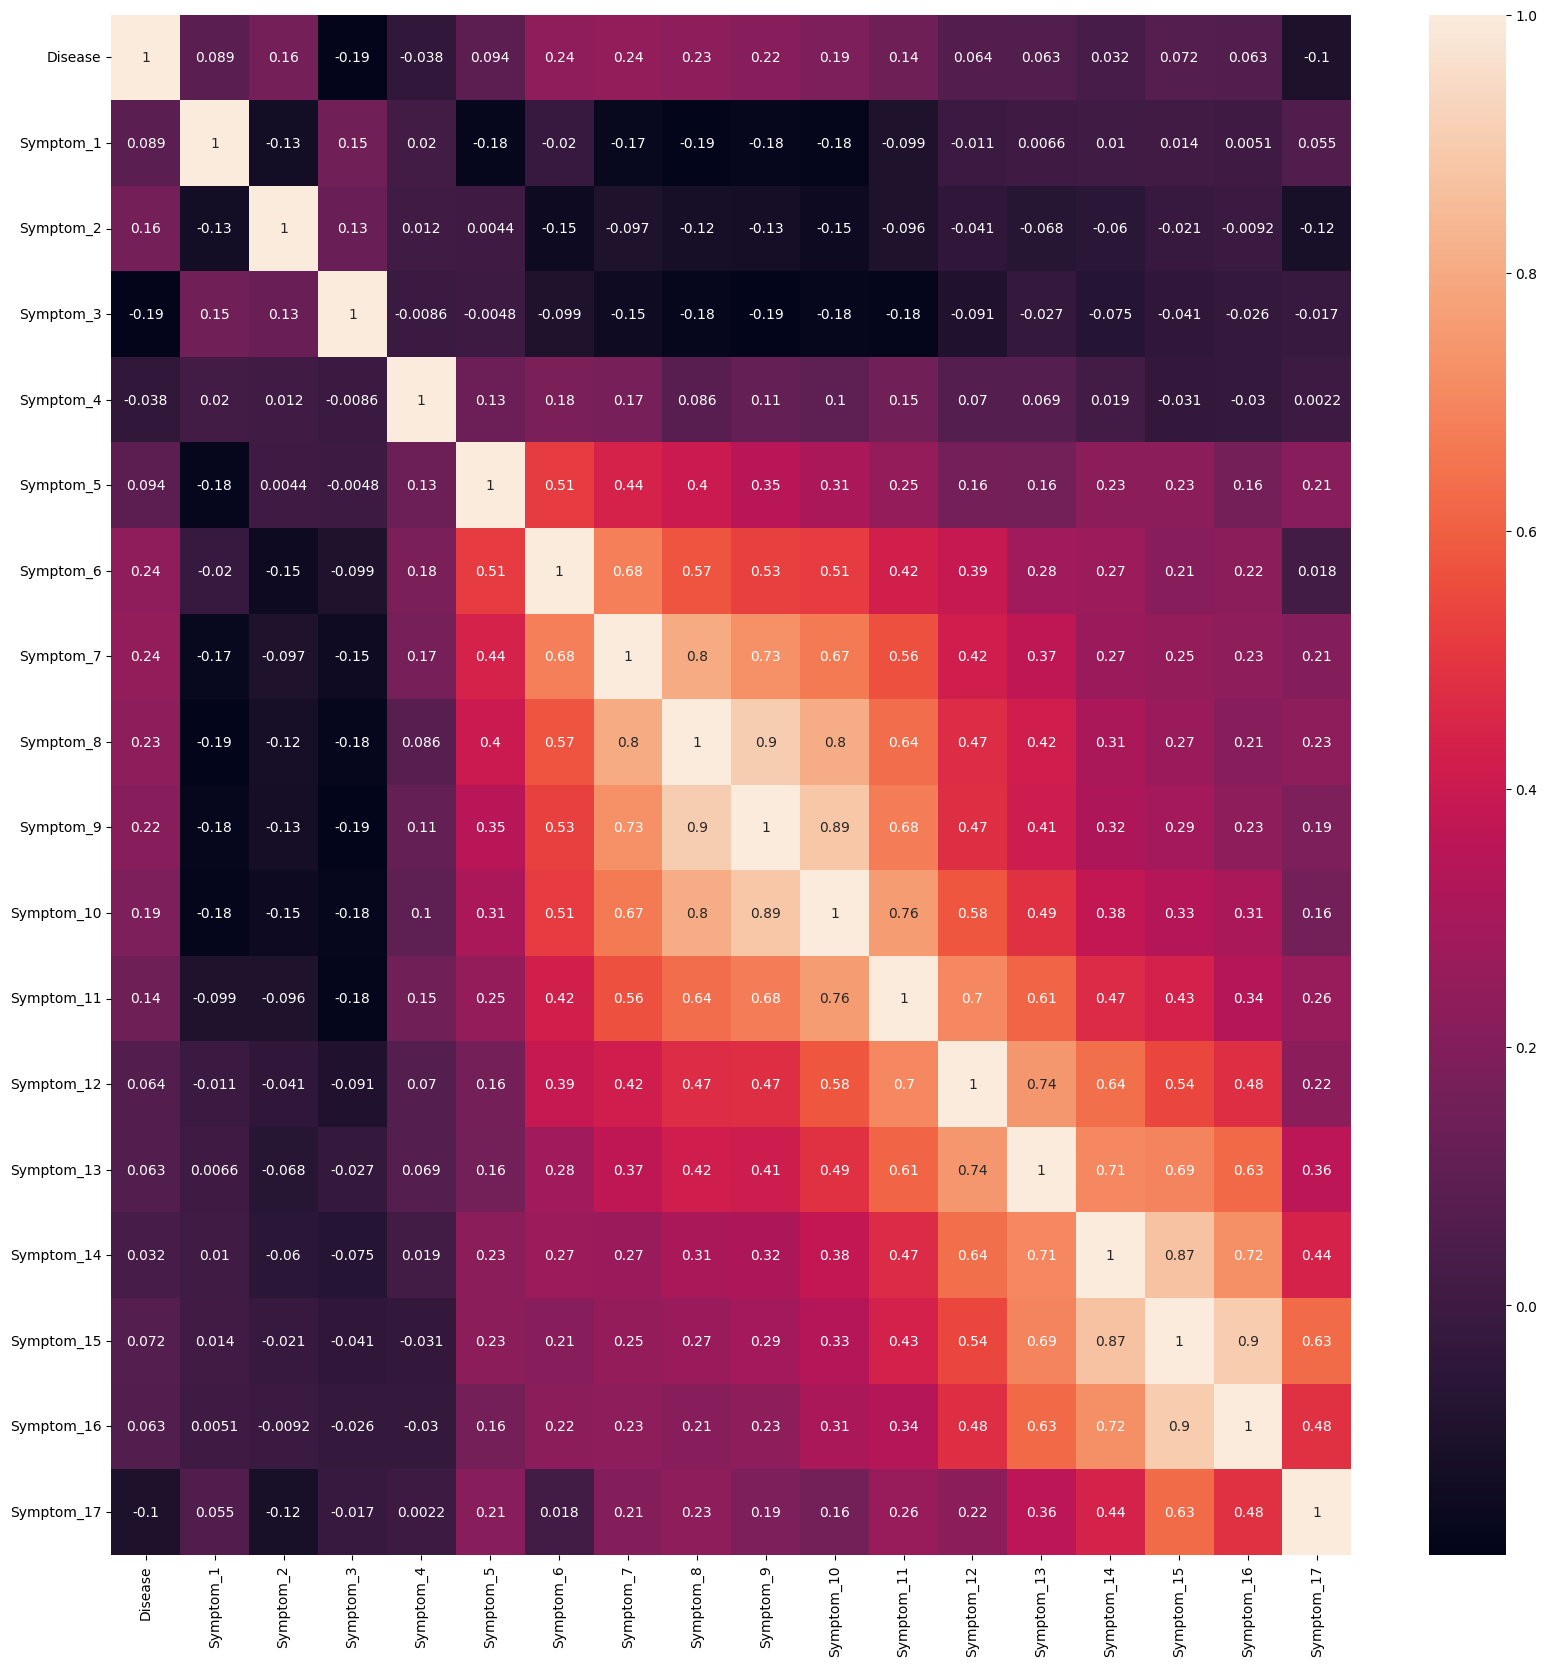

In [41]:
# draw heat map
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,color='blue')
plt.show()


## LINEAR REGRESSION


In [42]:
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])
df.head()

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0       15          1          3          4          6          0        0.0   
1       15          3          4          6          0          0        0.0   
2       15          1          4          6          0          0        0.0   
3       15          1          3          6          0          0        0.0   
4       15          1          3          4          0          0        0.0   

   Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0        0.0        0.0        0.0         0.0         0.0         0.0   
1        0.0        0.0        0.0         0.0         0.0         0.0   
2        0.0        0.0        0.0         0.0         0.0         0.0   
3        0.0        0.0        0.0         0.0         0.0         0.0   
4        0.0        0.0        0.0         0.0         0.0         0.0   

   Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [44]:
lr.coef_

array([ 2.75741656,  2.61793342, -2.50966105, -0.82451929, -0.27776093,
        1.09873068,  1.70105581,  3.3049584 , -2.12916755,  1.5185032 ,
       -0.10698057, -1.52115524, -0.07399569, -5.0925124 , 10.97080156,
       -3.84594672, -4.47735482])

In [45]:
lr.intercept_

20.150704278127055

In [46]:
y_pred=lr.predict(x_test)
y_pred

array([17.22026922, 16.33137374, 28.39644544, ..., 23.11025764,
       24.97967152, 21.23534632])

In [47]:
lr.score(x_test,y_test)

0.2583617888801536

In [48]:
#calculate rmse value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse
print("RMSE:",format(rmse,'.3f'))

RMSE: 10.135


In [49]:
from sklearn import metrics

In [50]:
absolute_error=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',absolute_error)
print('R squared: {:.2f}'.format(lr.score(x,y)*100))

Mean Absolute Error: 8.262653740689549
R squared: 26.50


In [51]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f"%accuracy)

 Accuracy of the model is 25.84


In [52]:
predicted_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
predicted_df.head()

Actual  Predicted  Difference
373        2  17.220269  -15.220269
4916       2  16.331374  -14.331374
1550      24  28.396445   -4.396445
3081       1  13.625001  -12.625001
3857       9  19.541030  -10.541030

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=17)
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(17),LinearRegression())

In [54]:
def PolynomialRegression(degree=17,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [55]:
import numpy as np
def make_data(N,err=1.0,rseed=1):
    rng=np.random.RandomState(rseed)
    x=rng.rand(N,1)**2
    y=10-1./(x.ravel()+0.1)
    if err>0:
      y+=err*rng.randn(N)
    return x,y
x,y=make_data(40)

In [56]:
"""x=df.drop('Disease',axis=1)
y=df['Disease']"""
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3444, 17), (1476, 17), (3444,), (1476,))

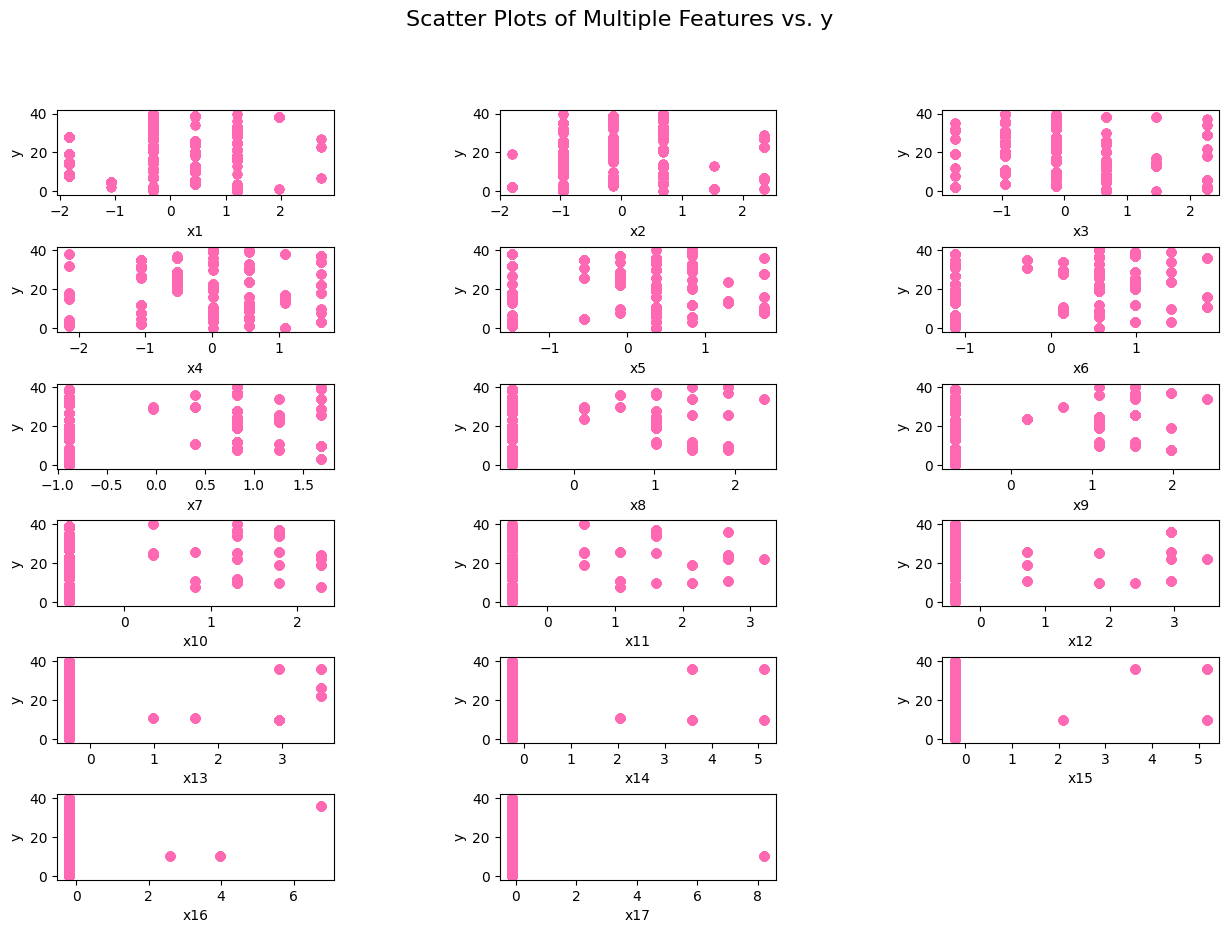

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(x, y)

# Create scatter plots for the selected independent variables against the dependent variable
num_features = 17  # The number of features
num_plots_per_row = 3  # Number of plots per row
num_rows = (num_features - 1) // num_plots_per_row + 1

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 10))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

for i in range(num_features):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    ax = axes[row, col]
    
    ax.scatter(x[:, i], y, color='hotpink', label=f'x{i + 1} vs. y')
    ax.set_xlabel(f'x{i + 1}')
    ax.set_ylabel('y')

# Common title for all plots
fig.suptitle("Scatter Plots of Multiple Features vs. y", fontsize=16)

# Hide any remaining empty subplots
for i in range(num_features, num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axes[row, col])

plt.show()


In [58]:
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

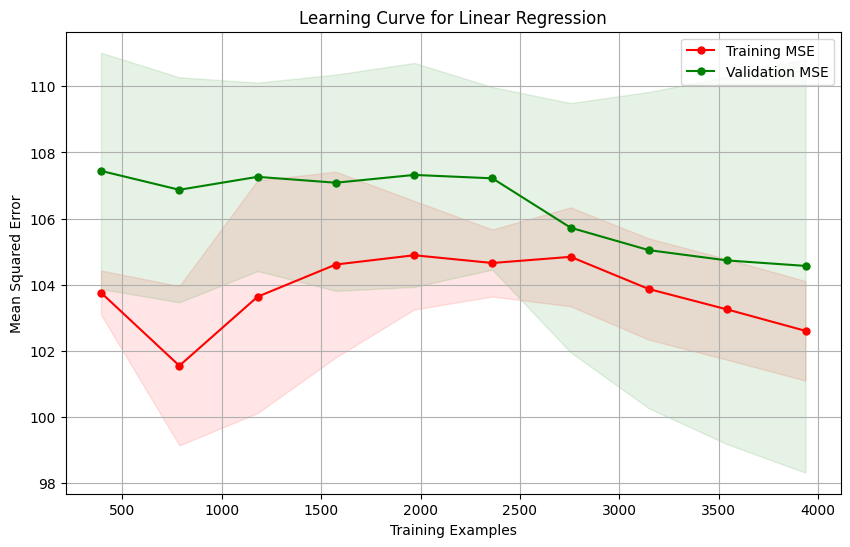

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# hyper parameter turning
model = LinearRegression()

# Define different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative mean squared error to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, marker="o", markersize=5, color="r", label="Training MSE")
plt.plot(train_sizes, test_mean, marker="o", markersize=5, color="g", label="Validation MSE")
plt.legend(loc="best")
plt.grid()
plt.show()


In [60]:
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

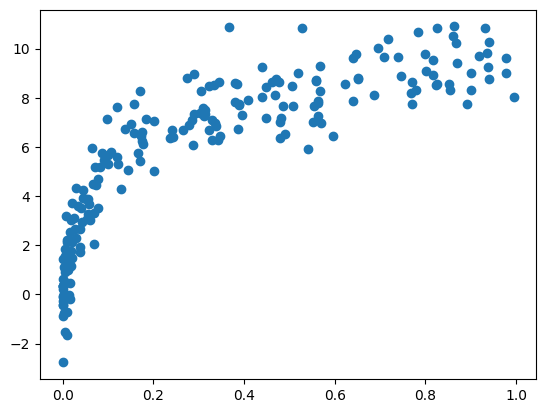

In [61]:
x2,y2=make_data(200)
plt.scatter(x2.ravel(),y2)
plt.show()

## Logistic regression


In [62]:
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logred_pred = logreg.predict(x_test)
logreg_acc=accuracy_score(y_test,logred_pred)
logreg_confidence=logreg.predict_proba(x_test)
print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

# Print confidence scores for Logistic Regression predictions
print("Confidence scores for Logistic Regression predictions:")
print(logreg_confidence)

Logistic Regression Classifier:
Accuracy on test set: 91.33%
Confidence scores for Logistic Regression predictions:
[[3.57231496e-13 6.24830447e-17 9.24278851e-01 ... 2.45940102e-12
  1.00708325e-12 1.28539178e-10]
 [5.46145511e-11 3.27308099e-16 9.37000256e-01 ... 5.85564385e-11
  5.69559012e-12 5.39353913e-10]
 [5.48222352e-07 1.45240839e-12 7.99307811e-06 ... 1.53146393e-07
  5.57967089e-05 5.33345273e-04]
 ...
 [1.31100892e-05 4.47486782e-08 2.63080876e-07 ... 4.52458118e-06
  1.19707401e-02 1.33145782e-02]
 [3.06207572e-07 1.79767100e-08 9.64357007e-07 ... 1.23130594e-05
  5.55006416e-09 8.55022022e-04]
 [1.43280099e-07 2.78236653e-13 2.61209749e-06 ... 2.44670624e-09
  1.07793229e-05 3.26444209e-06]]


In [64]:
#print the accuracy score of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.91


In [65]:
#print erros
print(classification_report(y_test,logred_pred))



              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.95      0.89        39
           2       1.00      1.00      1.00        41
           3       1.00      0.86      0.93        36
           4       0.79      0.86      0.82        35
           5       1.00      0.72      0.84        36
           6       0.89      0.70      0.78        44
           7       0.56      0.62      0.59        32
           8       1.00      1.00      1.00        35
           9       0.82      0.93      0.87        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       0.89      1.00      0.94        33
          13       0.95      0.82      0.88        45
          14       1.00      0.97      0.99        35
          15       0.76      1.00      0.86        28
          16       0.93      0.93      0.93        41
          17       0.79    

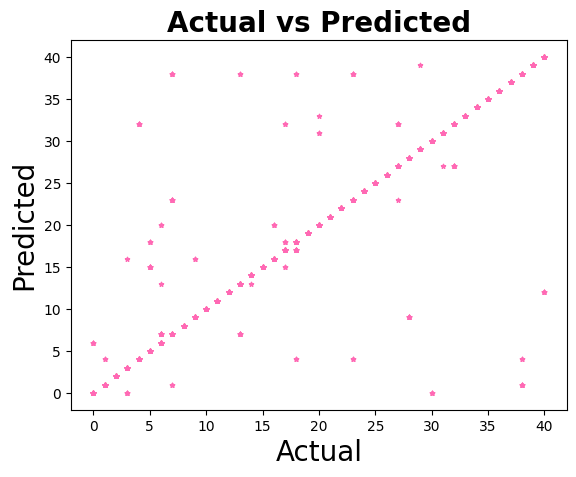

In [66]:
#plot the graph between predicted and the acutal values of logistric regression
plt.scatter(y_test,logred_pred,c='hotpink',label='Actual vs Predicted',marker='*',s=10)
plt.xlabel("Actual",fontsize=20,color='black')
plt.ylabel("Predicted",fontsize=20,color='black')
plt.title("Actual vs Predicted",fontsize=20,color='black',fontweight='bold')
plt.show()

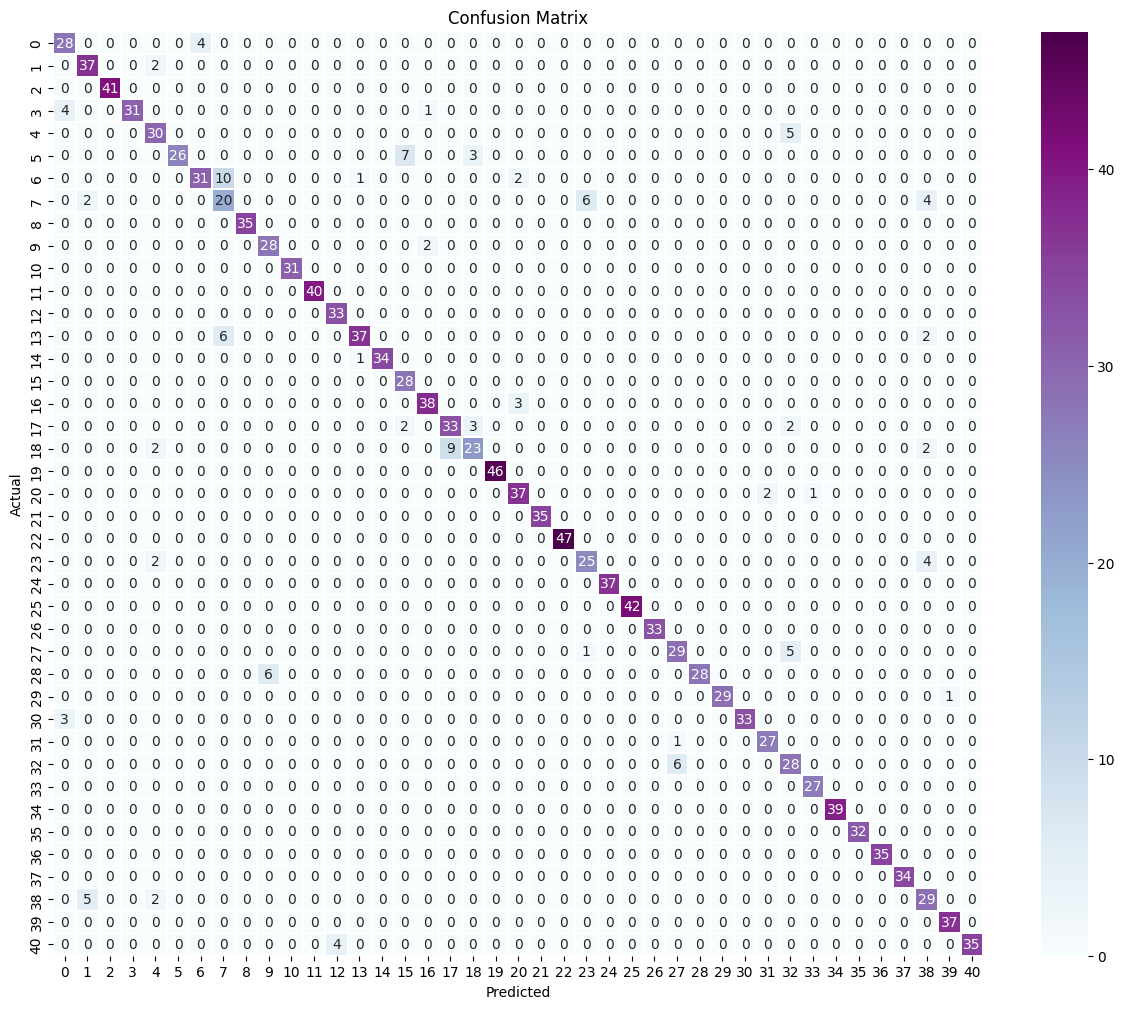

In [67]:
cm = confusion_matrix(y_test, logred_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', linewidths=0.2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

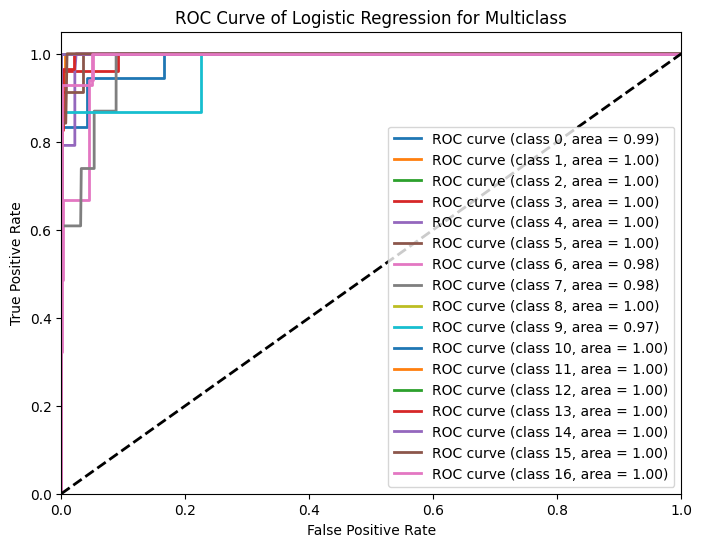

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)
lr.fit(X_train, y_train)

# Get class probabilities for the test set
y_prob = lr.predict_proba(X_test)

# Compute ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 17

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression for Multiclass')
plt.legend(loc='lower right')
plt.show()


In [69]:
# create an array with 17 columns and one row of random numbers b/w 1 15z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
z=[2,5,3,6,7,9,12,3,13,16,18,14,15,6,7,9,10]
z_reshape=np.array(z).reshape(1,-1)
logreg_confidence=logreg.predict_proba(z_reshape)
print("Confidence scores for Logistic Regression predictions:",logreg_confidence)
logreg_pred = logreg.predict(z_reshape)
print(logreg_pred)
max_confidence=max(logreg_confidence[0])
print("Maximum confidence",max_confidence)

Confidence scores for Logistic Regression predictions: [[5.98518798e-36 2.18020681e-34 7.92075593e-76 5.27676380e-09
  2.32239172e-58 9.08180965e-50 1.30053899e-31 2.59373143e-38
  6.77565773e-36 4.94355501e-47 2.42744157e-15 8.52084121e-17
  1.67845036e-50 3.95087627e-24 1.44554284e-35 2.49769591e-66
  7.34637543e-49 4.07040436e-57 1.08407075e-51 4.94246155e-31
  3.54038954e-51 4.59822854e-58 9.99999866e-01 5.02083319e-47
  2.98268485e-23 5.73134474e-16 7.42280447e-18 5.51409224e-63
  4.49632734e-34 3.28221475e-27 3.54873988e-49 2.07753505e-61
  1.01014699e-63 2.19924157e-40 1.28285347e-07 1.06359990e-65
  1.57941652e-17 5.94637662e-13 1.05660745e-38 1.25840154e-24
  4.24337211e-28]]
[22]
Maximum confidence 0.9999998664372919


In [70]:
logred_pred.shape

(1476,)

In [71]:
y_train.shape

(3936,)

In [72]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x=standardized_data
y=df['Disease']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of penalty
}

# Create a list of Logistic Regression models with different hyperparameters
logistic_models = []

for c in param_grid['C']:
    for penalty in param_grid['penalty']:
        model = LogisticRegression(C=c, penalty=penalty, solver='liblinear', random_state=42)
        logistic_models.append(model)

# Perform grid search for each logistic model
best_model = None
best_accuracy = 0

for model in logistic_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Print the best hyperparameters and test accuracy
print("Best hyperparameters:", best_model.get_params())
print("Test accuracy:", best_accuracy)


Best hyperparameters: {'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Test accuracy: 0.8973577235772358


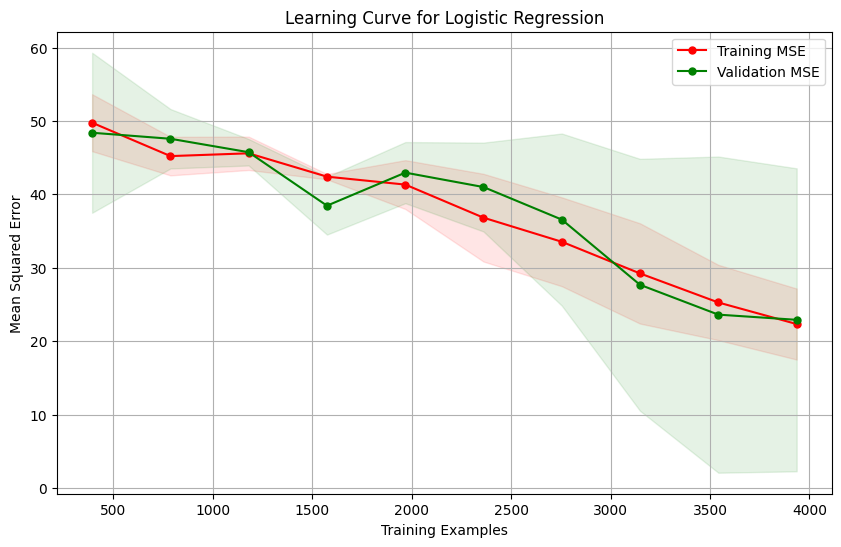

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# hyper parameter turning
model = LogisticRegression()

# Define different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative mean squared error to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, marker="o", markersize=5, color="r", label="Training MSE")
plt.plot(train_sizes, test_mean, marker="o", markersize=5, color="g", label="Validation MSE")
plt.legend(loc="best")
plt.grid()
plt.show()


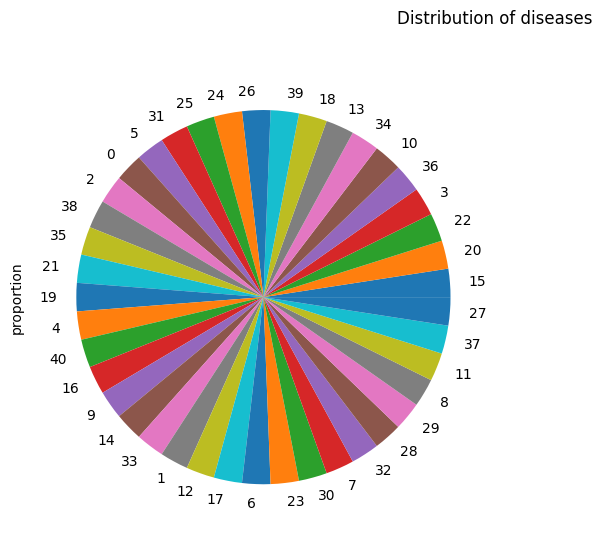

In [74]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Add the first subplot
ax1 = fig.add_subplot(1, 2, 1)

# Plot the pie chart
a = df['Disease'].value_counts(normalize=True).plot.pie()

# Add the second subplot


# Adjust the layout
plt.tight_layout()

# Set the title for the entire figure
fig.suptitle('Distribution of diseases')

# Show the figure
plt.show()


In [75]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples, n_features = 200, 50
x = df.drop('Disease', axis=1)
y = df['Disease']
true_coef = 3 * np.random.randn(n_features)

# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0

# Add some noise
x, y = x.iloc[:n_samples], y.iloc[:n_samples]  # Ensure the same number of samples
y += 5 * np.random.normal(size=(n_samples,))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)


NNLS R2 score 0.09129318440177747


In [76]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.20306161651853905


Text(0, 0.5, 'NNLS regression coefficients')

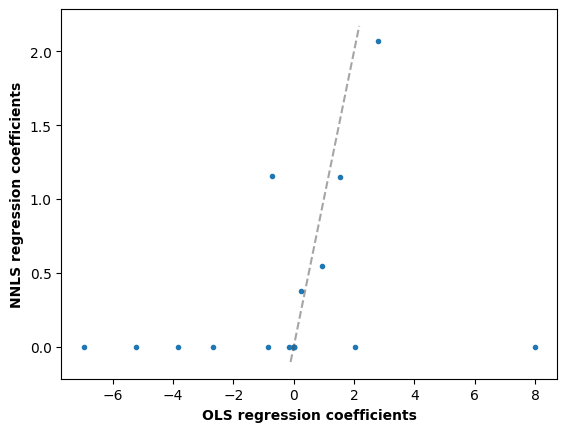

In [77]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## KNN

In [78]:
np.unique(y_train)

array([-2.03741617e+00, -1.53167487e+00,  3.81951761e-02,  8.26441151e-01,
        8.67430623e-01,  1.66367404e+00,  2.55242785e+00,  2.93642064e+00,
        3.07170512e+00,  4.13587393e+00,  4.95753199e+00,  4.99074469e+00,
        5.57318226e+00,  5.67671583e+00,  6.35119898e+00,  6.40864891e+00,
        6.49121478e+00,  6.61449145e+00,  6.68242526e+00,  6.71411407e+00,
        6.92316929e+00,  7.29941397e+00,  7.42348145e+00,  7.48492337e+00,
        8.38345400e+00,  8.60970783e+00,  8.64034067e+00,  8.70575987e+00,
        9.24668284e+00,  9.48262173e+00,  9.90911436e+00,  1.04897345e+01,
        1.07812001e+01,  1.08456784e+01,  1.13214001e+01,  1.23616893e+01,
        1.24028788e+01,  1.30745886e+01,  1.33162106e+01,  1.34539381e+01,
        1.35770106e+01,  1.36778282e+01,  1.40255673e+01,  1.42676704e+01,
        1.43979887e+01,  1.44313010e+01,  1.49342855e+01,  1.54806014e+01,
        1.58208698e+01,  1.63894702e+01,  1.64447530e+01,  1.64588039e+01,
        1.66204198e+01,  

In [79]:
#maker 40 colors and 40 markers
colors = ['red','green','blue','yellow','orange','purple','pink','brown','gray','olive','cyan','magenta','violet','lime','teal','aqua','maroon','navy','gold','tan','wheat','snow','salmon','plum','orchid','khaki','indigo','hotpink','firebrick','dodgerblue','darkviolet','darkturquoise','darkslategray','darkorange','darkmagenta','darkgreen','darkcyan','darkblue','crimson','green','blue','yellow','orange','purple','pink','brown','gray','olive','cyan','magenta','violet','lime','teal','aqua','maroon','navy','gold','tan','wheat','snow','salmon','plum','orchid','khaki','indigo','hotpink','firebrick','dodgerblue','darkviolet','darkturquoise','darkslategray','darkorange','darkmagenta','darkgreen','darkcyan','darkblue']
markers = ['o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_','.',',','1','2','3','4','8','s','p','P','*','h']

In [80]:
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,stratify=y,test_size=0.1)


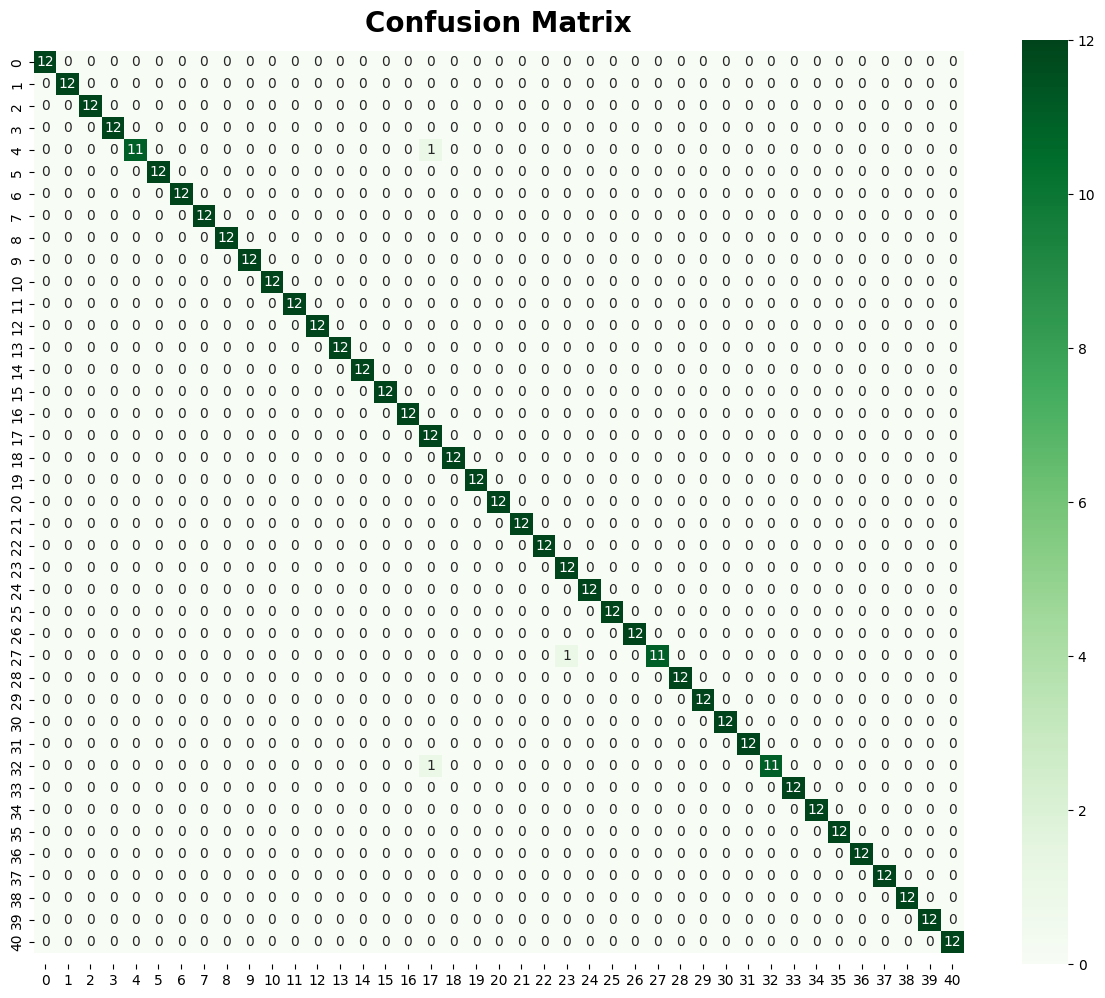

In [81]:
plt.figure(figsize=(15,12))
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
con=confusion_matrix(y_test,pred)
ax=sns.heatmap(con,annot=True,cmap="Greens",annot_kws={"size":10},fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix',fontsize=20,fontweight='bold')
plt.show()

In [82]:
# printing precision,recall,accuracy score etc
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
          17       0.86    

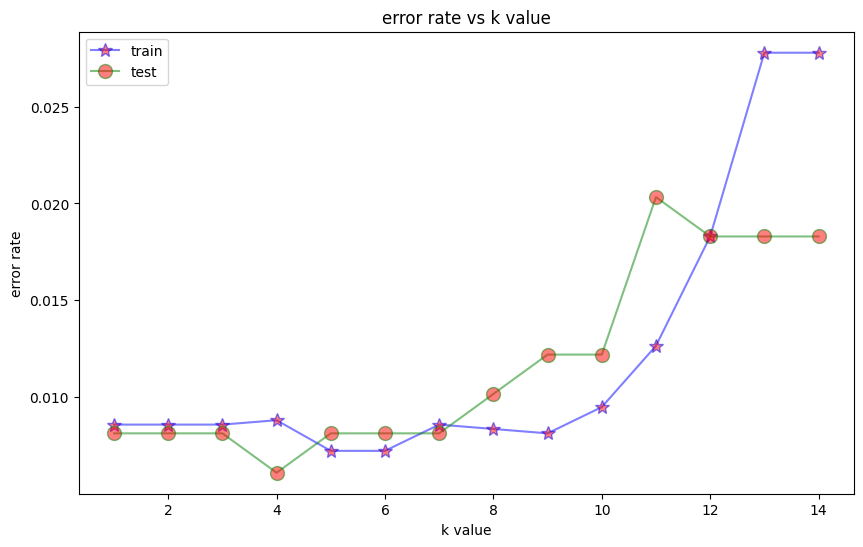

In [83]:
from sklearn.neighbors import KNeighborsClassifier
error1=[]
error2=[]
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_train)
    pred2=knn.predict(x_test)
    error1.append(np.mean(pred1!=y_train))
    error2.append(np.mean(pred2!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error1,color='blue',label='train',alpha=0.5,marker='*',markerfacecolor='red',markersize=10)
plt.plot(range(1,15),error2,color='green',label='test',alpha=0.5,marker='o',markerfacecolor='red',markersize=10)

plt.title('error rate vs k value')
plt.xlabel('k value')
plt.ylabel('error rate')
plt.legend()    
plt.show()

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
param_grid = {'n_neighbors': np.arange(1, 20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print(f"The best value of k is {best_k}")
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)
accuracy = best_knn.score(x_test, y_test)
print(f"Accuracy with the best k: {accuracy:.2f}")


The best value of k is 5
Accuracy with the best k: 0.99


In [85]:
#error rate is minimum at ALL K value, we take k=2

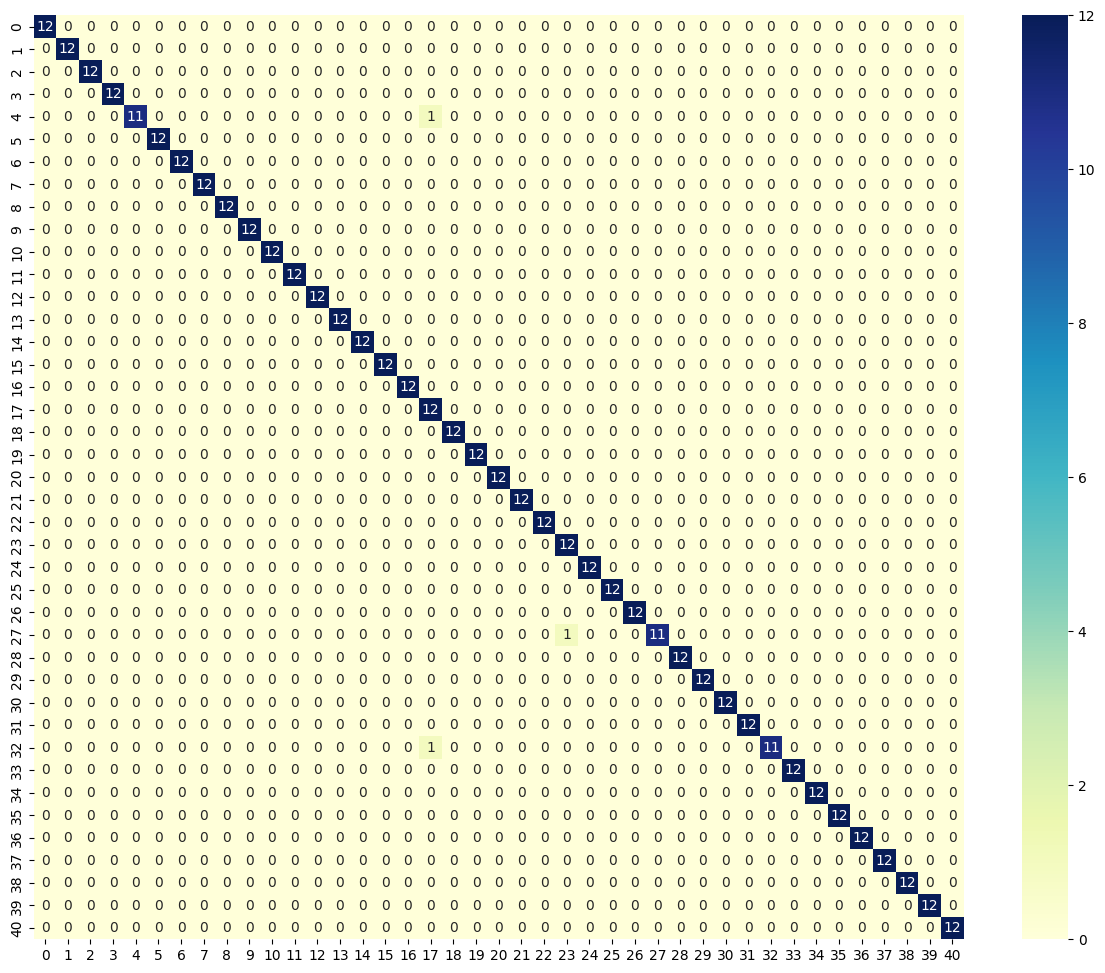

In [86]:
# After applying best fit k value
# make the figure size proper
plt.figure(figsize=(15,12))
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train,y_train)
predicted_value=clf.predict(x_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":10},cmap="YlGnBu",fmt="d")
plt.show()

In [87]:
import plotly.express as px

In [88]:
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred=knn.predict(x_test)
metrics.accuracy_score(y_test,pred)
recall=metrics.recall_score(y_test,pred,average='weighted')
precision=metrics.precision_score(y_test,pred,average='weighted')
f1_score=metrics.f1_score(y_test,pred,average='weighted')
print("KNN")
print('Accuracy:',metrics.accuracy_score(y_test,pred))
print('Recall:',recall)
print('Precision:',precision)
print('F1 Score:',f1_score)





KNN
Accuracy: 0.991869918699187
Recall: 0.991869918699187
Precision: 0.9930313588850174
F1 Score: 0.99200587323599


In [89]:
confusion_matrix(y_test,pred)

array([[12,  0,  0, ...,  0,  0,  0],
       [ 0, 12,  0, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 0,  0,  0, ...,  0,  0, 12]], dtype=int64)

In [90]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        12
           7       1.00      0.92      0.96        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
          17       0.86    

In [91]:
classification_report(y_test,pred,output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '4': {'precision': 1.0,
  'recall': 0.9166666666666666,
  'f1-score': 0.9565217391304348,
  'support': 12.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '7': {'precision': 1.0,
  'recall': 0.9166666666666666,
  'f1-score': 0.9565217391304348,
  'support': 12.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '11': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12.0},
 '12': {'precision': 1.0, 

In [92]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Polynomial Feature Transformation
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can add more values here
    'metric': ['euclidean', 'manhattan']  # Experiment with different distance metrics
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train_poly, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(x_test_poly, y_test)
print(f"Test accuracy: {accuracy:.2f}")


Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3}
Test accuracy: 0.99


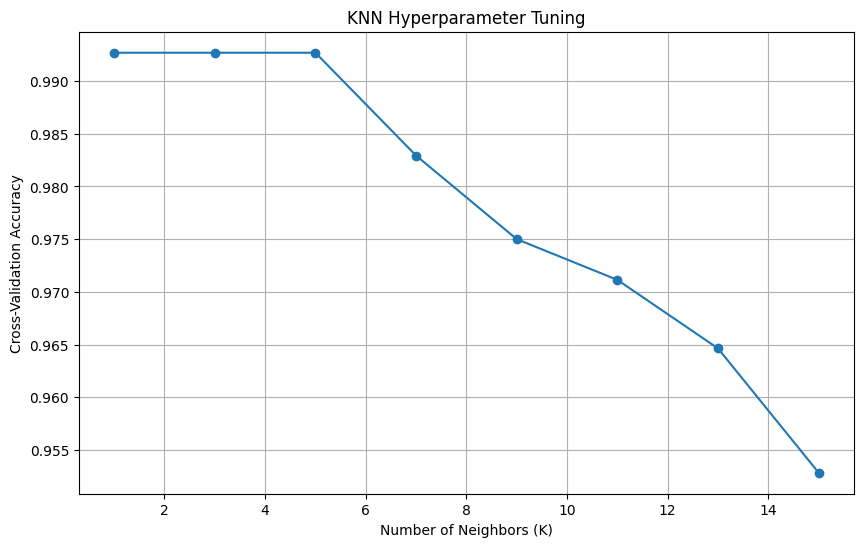

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameter values you want to tune
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],  # Example values for K
}

# Create an empty list to store the cross-validation results
cv_results = []

# Loop through each hyperparameter value and compute cross-validation scores
for k in param_grid['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)  # Assuming X and y are your data and labels
    cv_results.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], cv_results, marker='o', linestyle='-')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


## SVM


In [94]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit,validation_curve

In [95]:
svm_classifier=SVC(kernel='linear',C=0.1)
svm_classifier.fit(x_train,y_train)
pred=svm_classifier.predict(x_test)
accuracy=svm_classifier.score(x_test,y_test)
precision=metrics.precision_score(y_test,pred,average='weighted')
recall=metrics.recall_score(y_test,pred,average='weighted')
f1_score=metrics.f1_score(y_test,pred,average='weighted')
print("SVM")
print('Accuracy:',accuracy)
print('Recall:',recall)
print('Precision:',precision)
print('F1 Score:',f1_score)


SVM
Accuracy: 0.9217479674796748
Recall: 0.9217479674796748
Precision: 0.9321275671698648
F1 Score: 0.9213225620787169


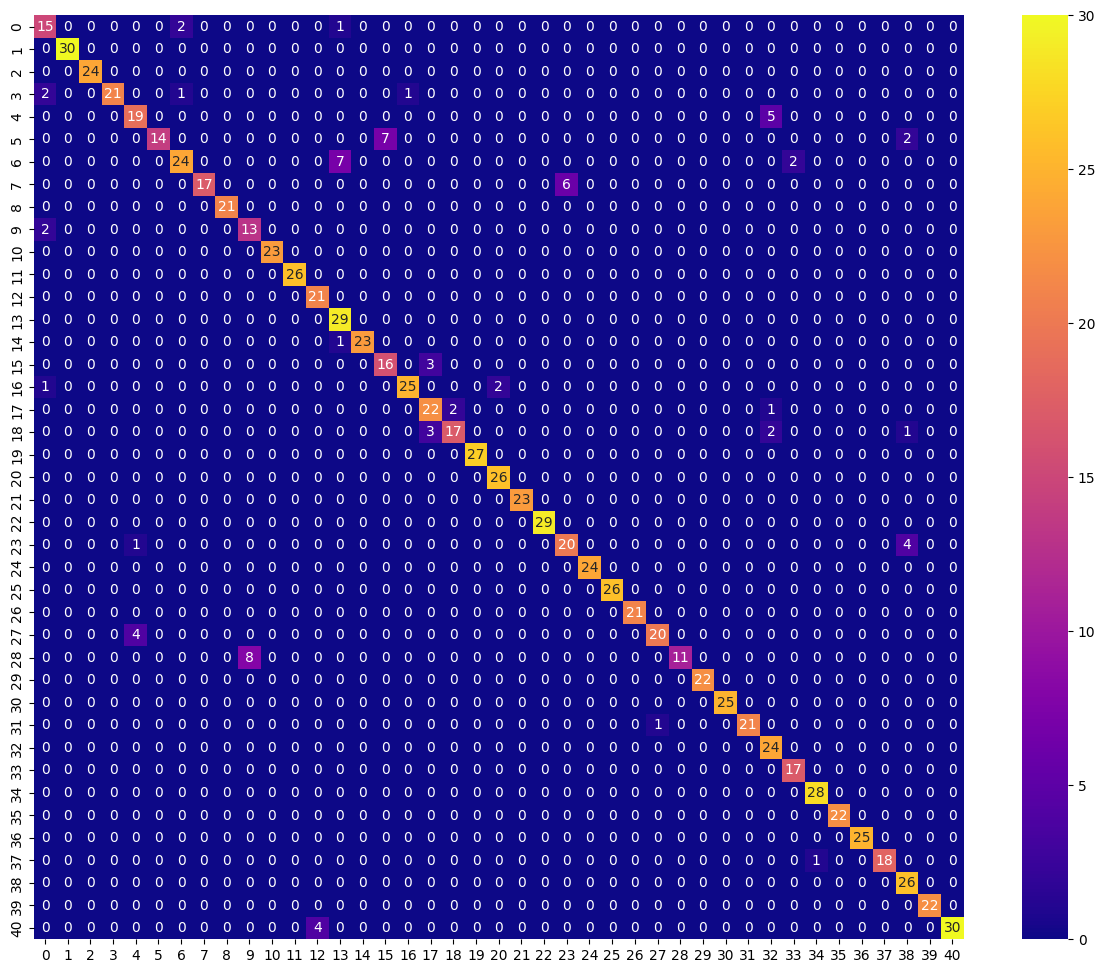

In [96]:
#visualize the svm classifier
plt.figure(figsize=(15,12))
clf=SVC(kernel='linear',C=0.1)
clf.fit(x_train,y_train)
predicted_value=clf.predict(x_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":10},cmap="plasma",fmt='g')
plt.show()


In [97]:
svm_linear=SVC(kernel='linear',C=0.01)
svm_linear.fit(x_train,y_train)
print("Accuracy of SVM linear kernel is:",svm_linear.score(x_train,y_train))

Accuracy of SVM linear kernel is: 0.8236788617886179


In [98]:
print("accuracy:",svm_linear.score(x_test,y_test))

accuracy: 0.7967479674796748


In [99]:
svm_linear=SVC(kernel='linear',C=100)
svm_linear.fit(x_train,y_train)
print("Accuracy of SVM linear kernel is:",svm_linear.score(x_train,y_train))

Accuracy of SVM linear kernel is: 0.9857723577235772


In [100]:
# do confusion matrix and classification report
pred=svm_linear.predict(x_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       0.86      1.00      0.92        24
           5       1.00      1.00      1.00        23
           6       0.97      0.97      0.97        33
           7       1.00      0.87      0.93        23
           8       1.00      1.00      1.00        21
           9       1.00      0.87      0.93        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       0.97      1.00      0.98        29
          14       1.00      1.00      1.00        24
          15       1.00      0.84      0.91        19
          16       1.00      1.00      1.00        28
          17       0.83    

Best hyperparameters: {'C': 100, 'degree': 2, 'kernel': 'poly'}
Test accuracy: 0.991869918699187


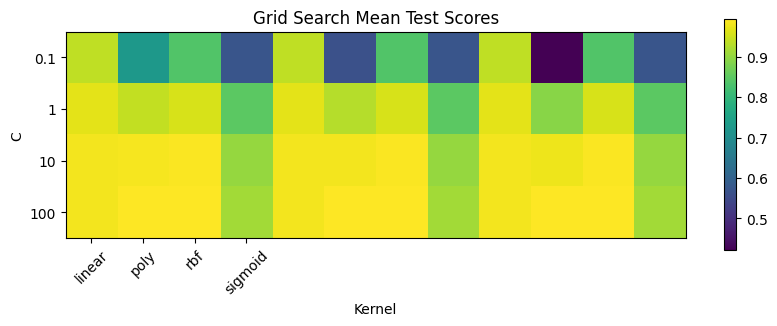

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the SVM parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # SVM regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Polynomial degree (for 'poly' kernel)
}

# Create an SVM classifier
svm = SVC()

# Perform grid search using cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train an SVM model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(x_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

# Visualize the grid search results
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), -1)

plt.figure(figsize=(10, 3))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.get_cmap('viridis'))
plt.xlabel('Kernel')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['kernel'])), param_grid['kernel'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Grid Search Mean Test Scores')
plt.show()


In [102]:
x=standardized_data
y=df['Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

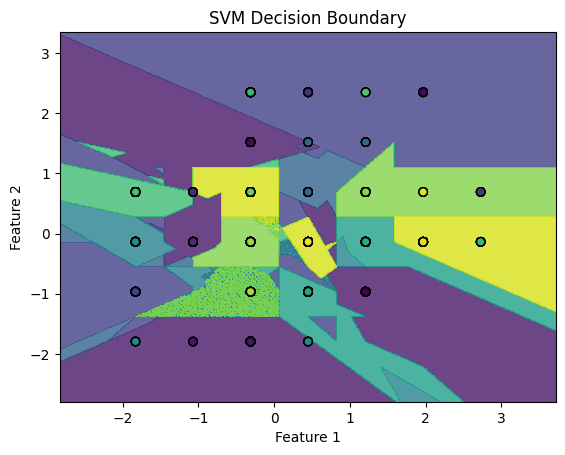

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()
X = x[:, :2]  # We only take the first two features for visualization


# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Define SVM hyperparameters
C = 1.0  # Regularization parameter
kernel = 'linear'  # Kernel type

# Create an SVM classifier
svc = SVC(C=C, kernel=kernel)
svc.fit(X, y)

# Predict class labels for each point in the mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


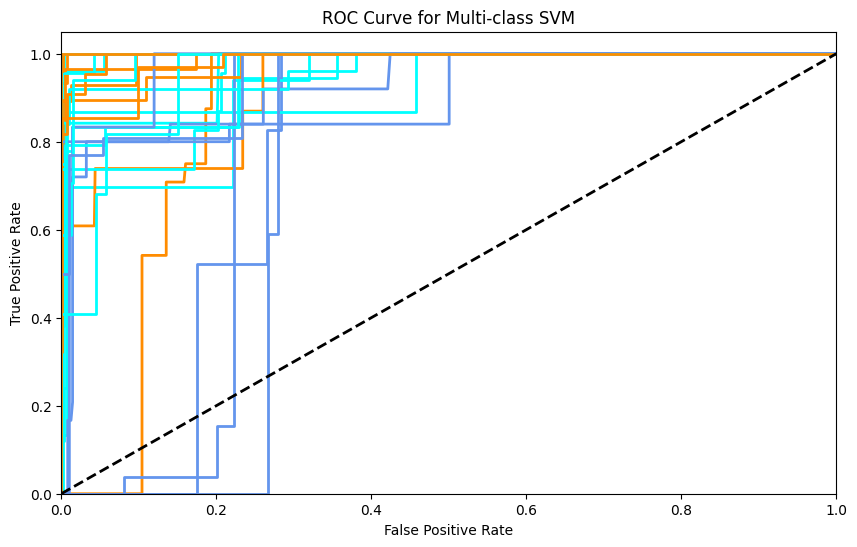

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle


# Binarize the target classes for multi-class classification
n_classes = len(set(y))
y_bin = label_binarize(y, classes=list(range(n_classes)))

# Split the dataset into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=42)

# Create an SVM classifier (you can set hyperparameters as needed)
svm = OneVsRestClassifier(SVC(probability=True, kernel='linear', random_state=42))

# Fit the model
svm.fit(x_train, y_train)

# Calculate predicted probabilities for each class
y_score = svm.decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class SVM')
plt.show()


In [105]:
x=standardized_data
y=df['Disease']
y.shape

(4920,)

## Polynomial degree


In [106]:
x = standardized_data  # Your feature data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(x_train, y_train)
print("polynomial kernel of degree=3")
print("accuracy:", svm_poly.score(x_train,y_train))
print("precision:", metrics.precision_score(y_test,svm_poly.predict(x_test),average='weighted'))
print("f1 score:", metrics.f1_score(y_test,svm_poly.predict(x_test),average='weighted'))
print("recall:", metrics.recall_score(y_test,svm_poly.predict(x_test),average='weighted'))  



polynomial kernel of degree=3
accuracy: 0.9542682926829268
precision: 0.9544547769920335
f1 score: 0.9457851488198156
recall: 0.9451219512195121


In [108]:
#display classfication report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      0.84      0.91        25
           4       0.79      0.79      0.79        24
           5       1.00      0.61      0.76        23
           6       0.89      0.73      0.80        33
           7       1.00      0.74      0.85        23
           8       1.00      1.00      1.00        21
           9       0.62      0.87      0.72        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       0.84      1.00      0.91        21
          13       0.76      1.00      0.87        29
          14       1.00      0.96      0.98        24
          15       0.70      0.84      0.76        19
          16       0.96      0.89      0.93        28
          17       0.79    

# RBF KERNAL


In [120]:
svm_gamma=SVC(kernel='rbf',gamma=0.1)
svm_gamma.fit(x_train,y_train)
print("gamma=0.1")
print("Accurarcy:",svm_gamma.score(x_train,y_train))
print("f1_score:",f1_score(y_test,svm_gamma.predict(x_test),average='weighted'))
print("Recall:",recall_score(y_test,svm_gamma.predict(x_test),average='weighted'))
print("Precision:",precision_score(y_test,svm_gamma.predict(x_test),average='weighted'))

gamma=0.1
Accurarcy: 0.9763719512195121
f1_score: 0.972627494625587
Recall: 0.9725609756097561
Precision: 0.975670274042004


In [121]:
svm_gamma=SVC(kernel='rbf',gamma=1)
svm_gamma.fit(x_train,y_train)
print("gamma=1")
print("Accurarcy:",svm_gamma.score(x_train,y_train))
print("precession:",precision_score(y_test,svm_gamma.predict(x_test),average='weighted'))
print("f1_score:",f1_score(y_test,svm_gamma.predict(x_test),average='weighted'))
print("Recall:",recall_score(y_test,svm_gamma.predict(x_test),average='weighted'))

gamma=1
Accurarcy: 0.9928861788617886
precession: 0.9925787570604645
f1_score: 0.9918272030976281
Recall: 0.991869918699187


In [122]:
svm_gamma=SVC(kernel='sigmoid')
svm_gamma.fit(x_train,y_train)
print("Accurarcy :",svm_gamma.score(x_train,y_train))


Accurarcy : 0.8574695121951219


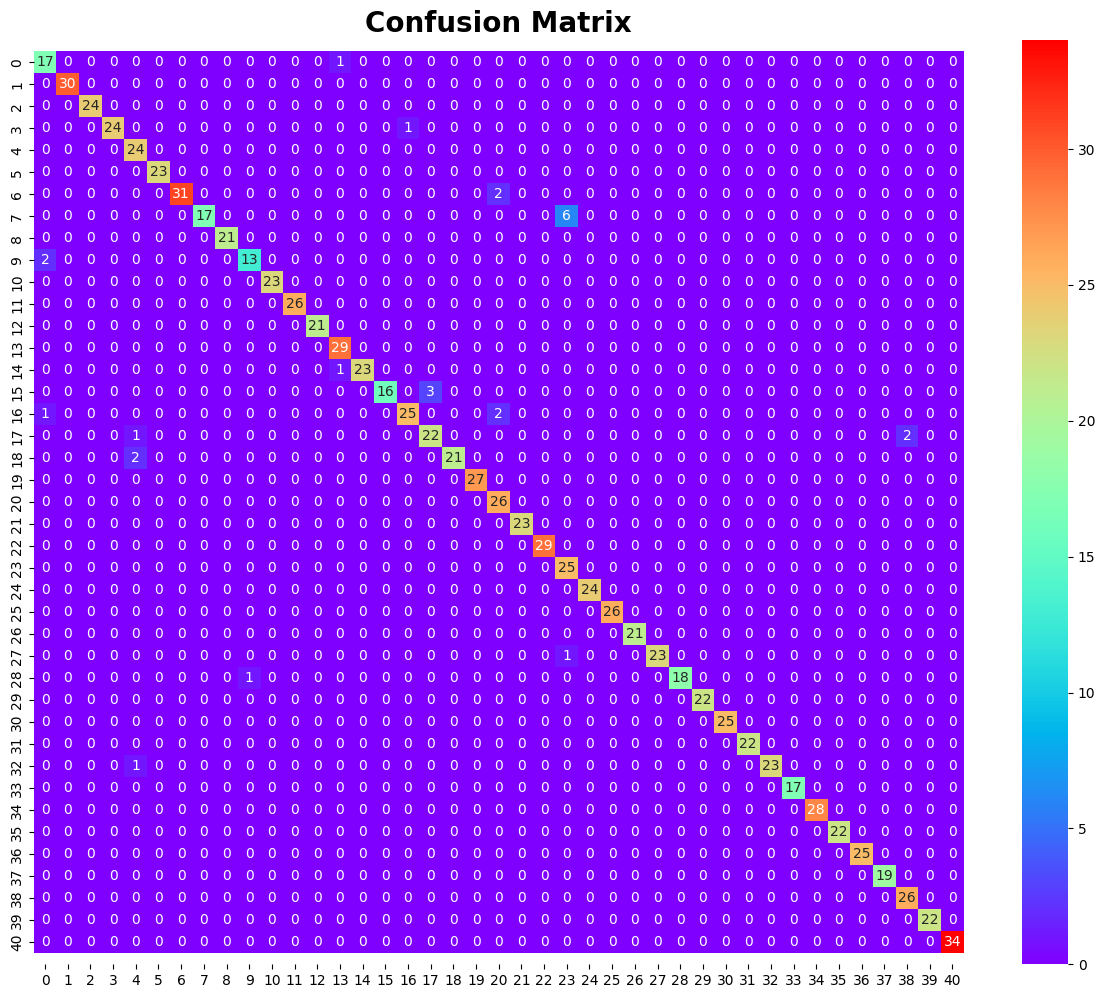

In [123]:
#draw confusion matrix for this
plt.figure(figsize=(15,12))
clf=SVC(kernel='rbf',gamma=0.1)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
con=confusion_matrix(y_test,pred)
ax=sns.heatmap(con,annot=True,annot_kws={"size":10},color='hotpink',fmt='d',cmap="rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix',fontsize=20,fontweight='bold')
plt.show()


In [124]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      0.96      0.98        25
           4       0.86      1.00      0.92        24
           5       1.00      1.00      1.00        23
           6       1.00      0.94      0.97        33
           7       1.00      0.74      0.85        23
           8       1.00      1.00      1.00        21
           9       0.93      0.87      0.90        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       0.94      1.00      0.97        29
          14       1.00      0.96      0.98        24
          15       1.00      0.84      0.91        19
          16       0.96      0.89      0.93        28
          17       0.88    

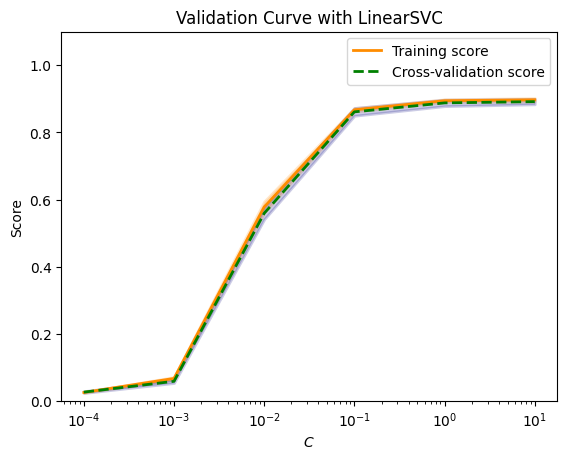

In [125]:

model_l1 = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, tol=1e-3)
#We compute the mean test score for different values of C via cross-validation.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#We use logarithmic spacing of C
param_range = np.logspace(-4, 1, 6)
train_scores, test_scores = validation_curve(model_l1, x_train, y_train, param_name="C", param_range=param_range, cv=cv, n_jobs=1)
#We compute the mean and std of the cross-validation train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores, axis=1)
#We plot the corresponding curves
plt.title("Validation Curve with LinearSVC")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="green", lw=lw, linestyle="--")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


## Decision Tree Classifier


In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
x=df.drop('Disease',axis=1)
y=df['Disease']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, Y_train)

# Predict disease labels on the testing data
Y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("Decision Tree")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))

Decision Tree
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-Score: 0.9914564591749411
976


## Visualize Decision Tree before feature selection

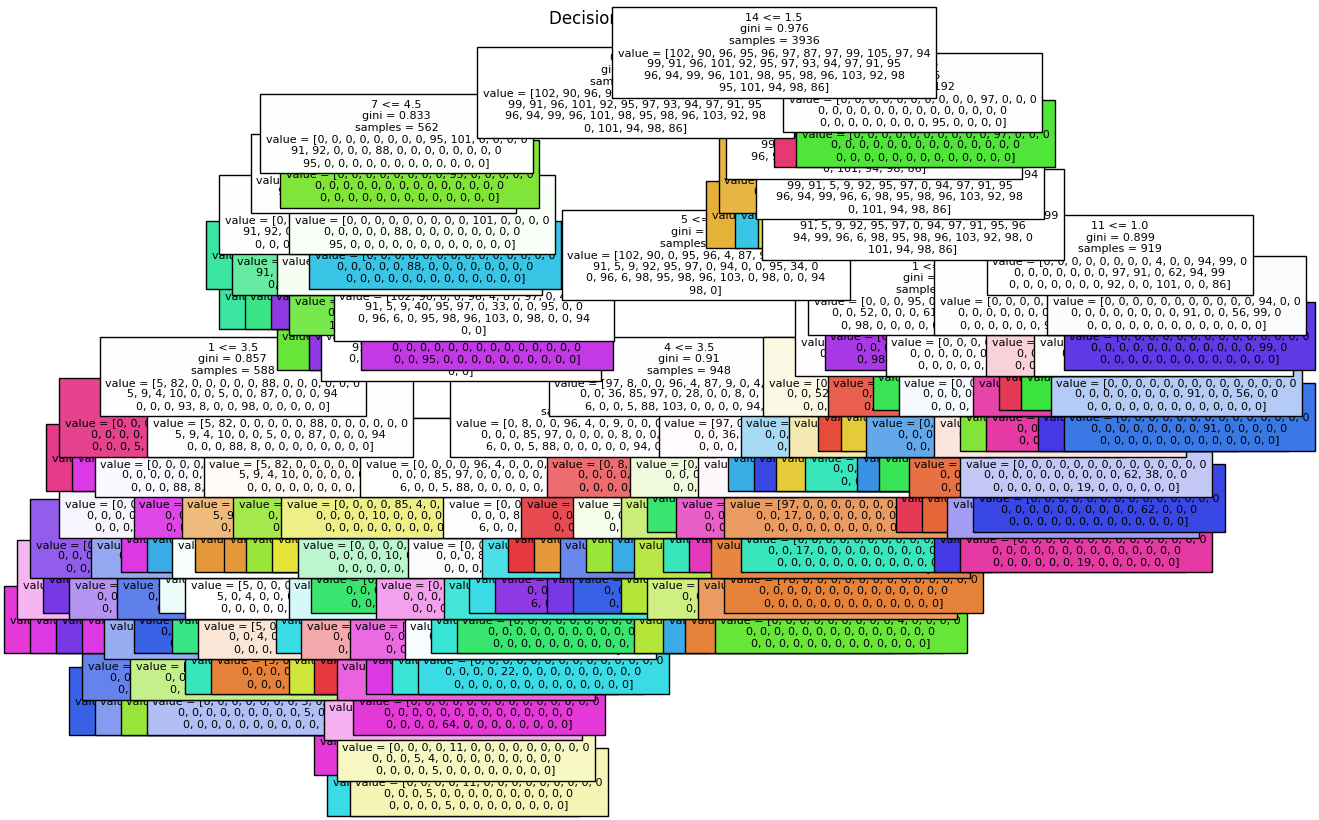

In [128]:
# Visualization
plt.figure(figsize=(14, 10))
plot_tree(dt_classifier, filled=True, fontsize=8, feature_names=[str(i) for i in range(X_train.shape[1])])
plt.title("Decision Tree Visualization")
plt.show()

# Decision Tree Visualization (Limited Depth)

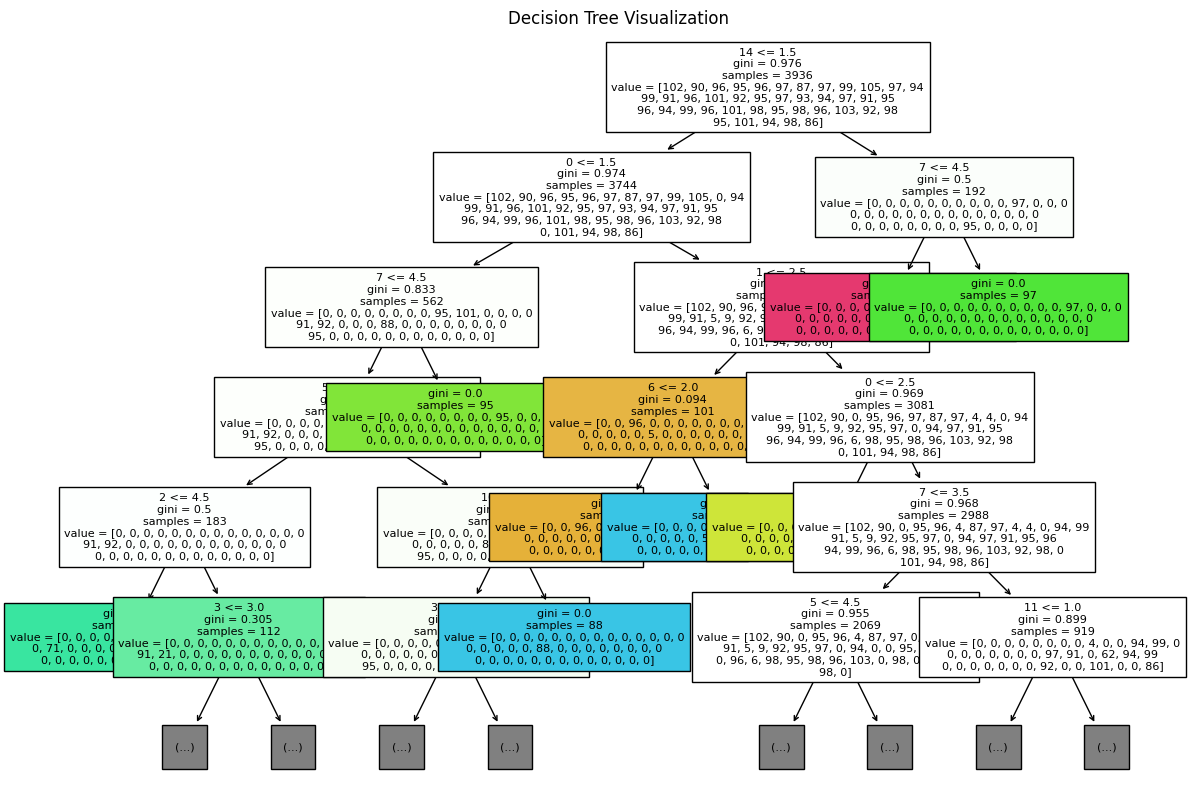

In [129]:
# Visualization
plt.figure(figsize=(14, 10))
plot_tree(dt_classifier, filled=True, fontsize=8,max_depth=5 ,feature_names=[str(i) for i in range(X_train.shape[1])])
plt.title("Decision Tree Visualization")
plt.show()



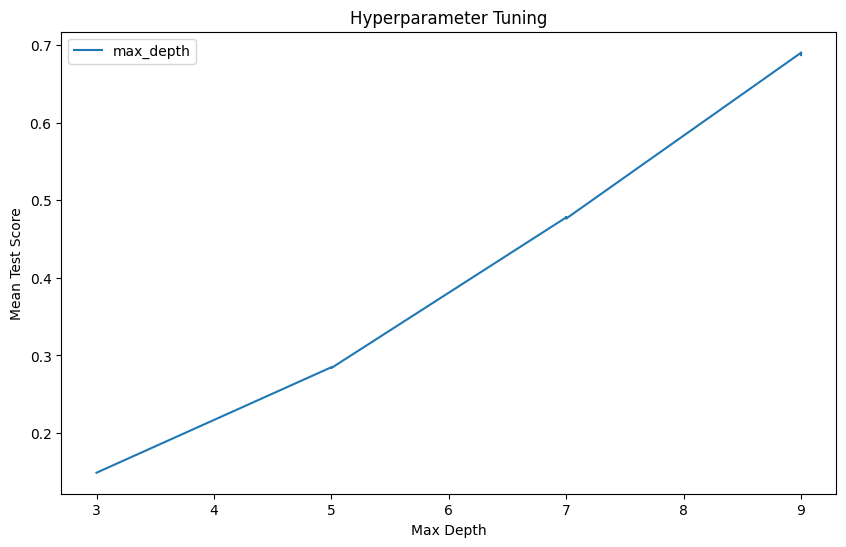

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and use them in the model
best_params = grid_search.best_params_
dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
dt_classifier.fit(X_train, Y_train)

# Visualize hyperparameter tuning
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(results['param_max_depth'], results['mean_test_score'], label='max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend()
plt.title('Hyperparameter Tuning')
plt.show()

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict disease labels on the testing data using the tuned model
Y_pred_tuned = dt_classifier.predict(X_test)

# Calculate evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(Y_test, Y_pred_tuned)
precision_tuned = precision_score(Y_test, Y_pred_tuned, average='macro')
recall_tuned = recall_score(Y_test, Y_pred_tuned, average='macro')
f1_tuned = f1_score(Y_test, Y_pred_tuned, average='macro')

print("Decision Tree - After Hyperparameter Tuning")
print(f'Accuracy: {accuracy_tuned}')
print(f'Precision: {precision_tuned}')
print(f'Recall: {recall_tuned}')
print(f'F1-Score: {f1_tuned}')


Decision Tree - After Hyperparameter Tuning
Accuracy: 0.6219512195121951
Precision: 0.5864832604931356
Recall: 0.6405130157558019
F1-Score: 0.5884941749638338


In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Feature Importance

Feature Importance:
1. Feature 1: 0.18600458580051213
2. Feature 0: 0.14420306673147537
3. Feature 3: 0.13360895448312046
4. Feature 7: 0.10775331139574305
5. Feature 2: 0.10359927061280617
6. Feature 5: 0.08830473342108597
7. Feature 4: 0.07422644132121166
8. Feature 10: 0.05431131799032949
9. Feature 8: 0.03634825664327972
10. Feature 14: 0.025234442577290874
11. Feature 9: 0.021995529414875106
12. Feature 11: 0.021912096613514447
13. Feature 6: 0.0024979929947556057
14. Feature 15: 0.0
15. Feature 12: 0.0
16. Feature 13: 0.0
17. Feature 16: 0.0


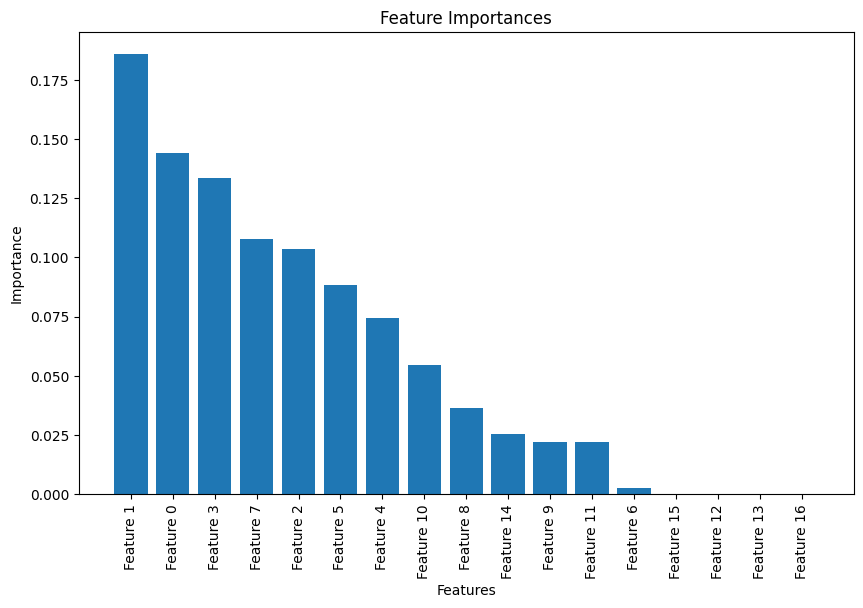

In [133]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, Y_train)

# Feature Importance
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Display feature importance
print("Feature Importance:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")

# Create a better visualization using a bar plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [f'Feature {i}' for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


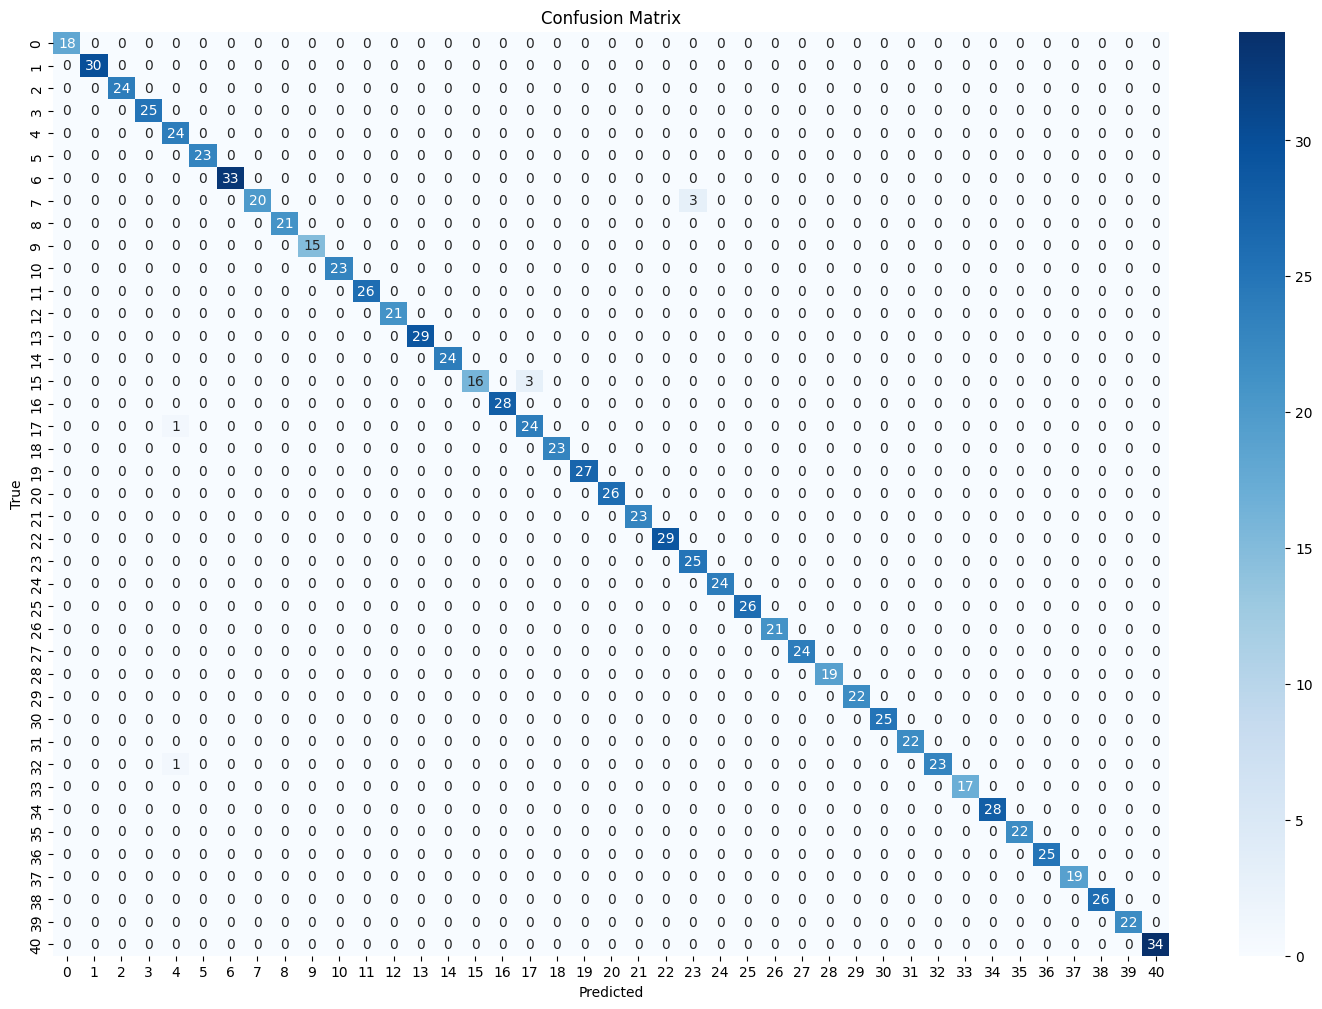

In [137]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(18, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Classification report

In [138]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       0.92      1.00      0.96        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      0.87      0.93        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      0.84      0.91        19
          16       1.00      1.00      1.00        28
          17       0.89    

# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc_classifier.fit(X_train, Y_train)

# Predict disease labels on the testing data
Y_pred = rfc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Random Forest")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred, normalize=False))
print("Confusion matrix")
print(conf_matrix)

Random Forest
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-Score: 0.9914564591749411
976
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


### Plotting feature importances for the Random Forest

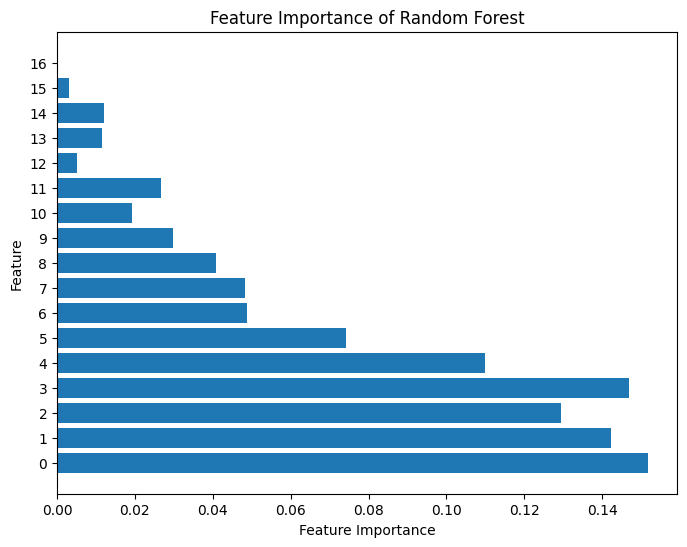

In [140]:
import matplotlib.pyplot as plt

feature_importances = rfc_classifier.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), range(len(feature_importances)))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest')
plt.show()


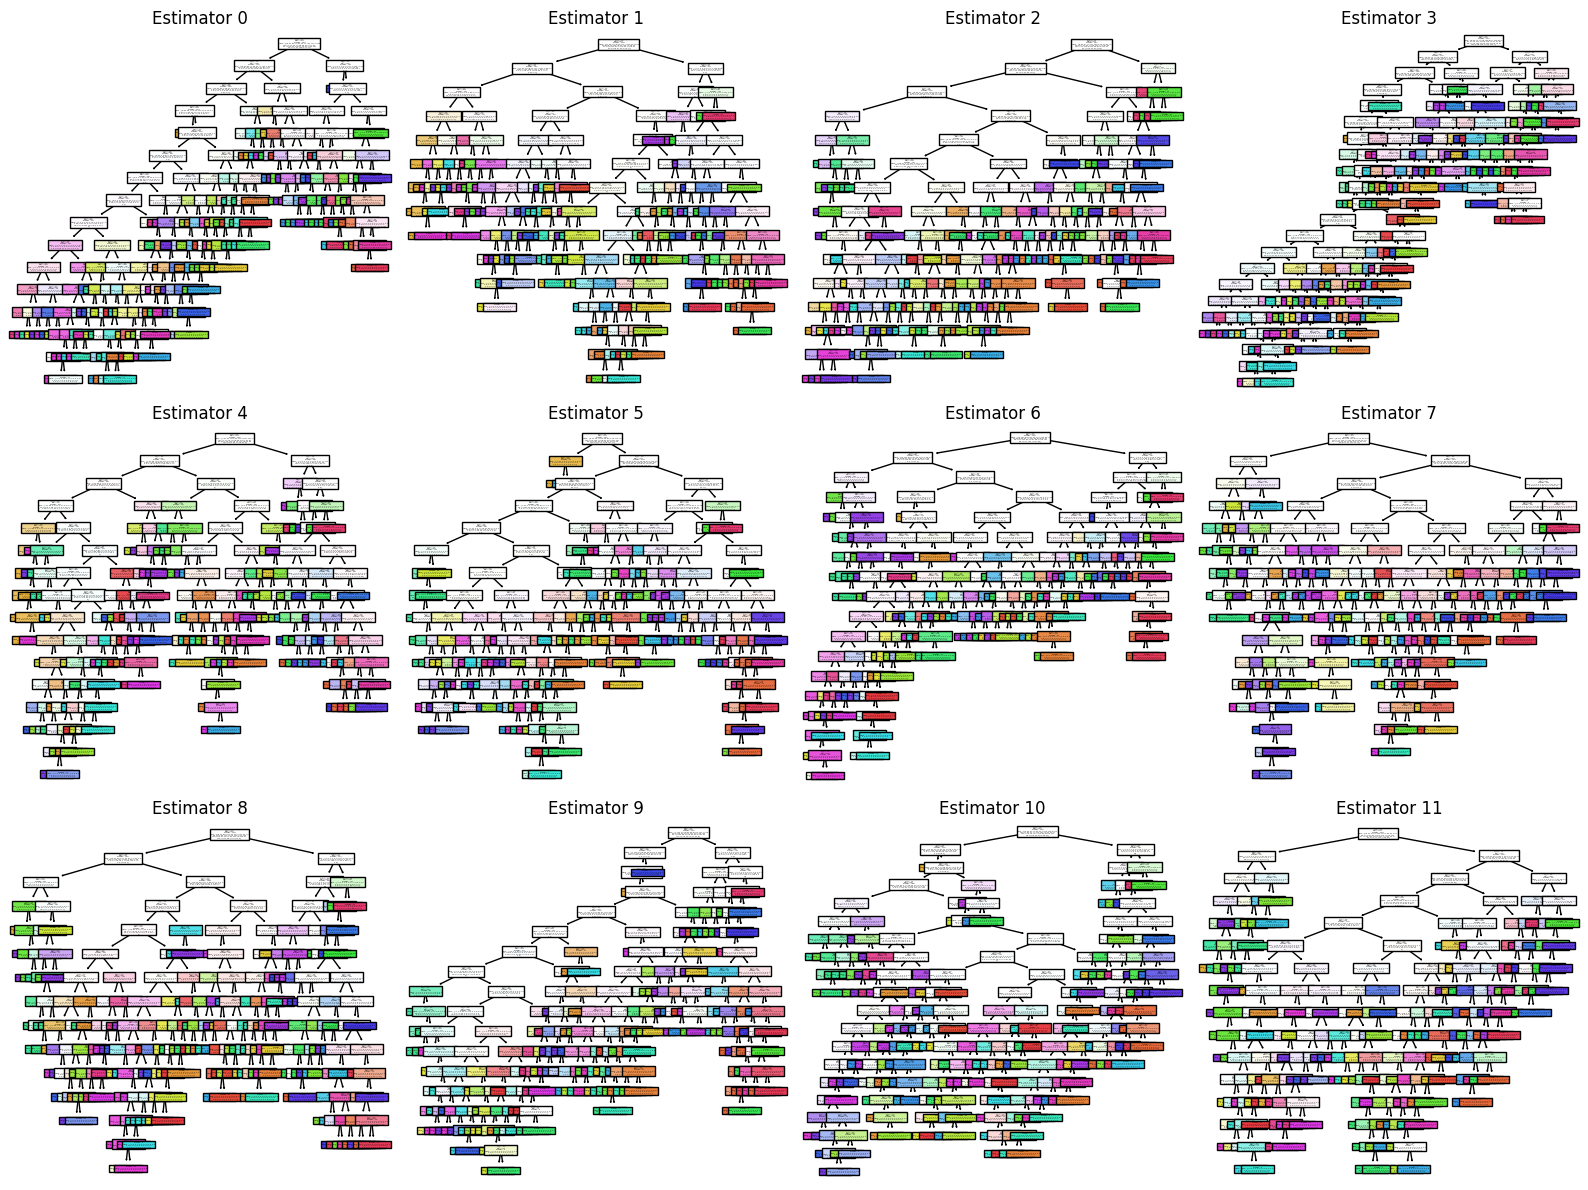

In [141]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 12))
num_estimators_to_display = min(len(rfc_classifier.estimators_), 12)  # Limit to 12 or the total number of estimators
for index, estimator in enumerate(rfc_classifier.estimators_[:num_estimators_to_display]):
    plt.subplot(3, 4, index + 1)
    plot_tree(estimator, filled=True)
    plt.title(f"Estimator {index}")
plt.tight_layout()
plt.show()


# Gaussian Naive Bayes 

In [142]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
NB_classifier = GaussianNB()

# Fit the model on the training data
NB_classifier.fit(X_train, Y_train)

# Predict disease labels on the testing data
Y_pred = NB_classifier.predict(X_test)

precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("Gaussian NB")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))


Gaussian NB
Accuracy: 0.991869918699187
Precision: 0.8700957164974538
Recall: 0.8628523277630417
F1-Score: 0.8508545371573774
844


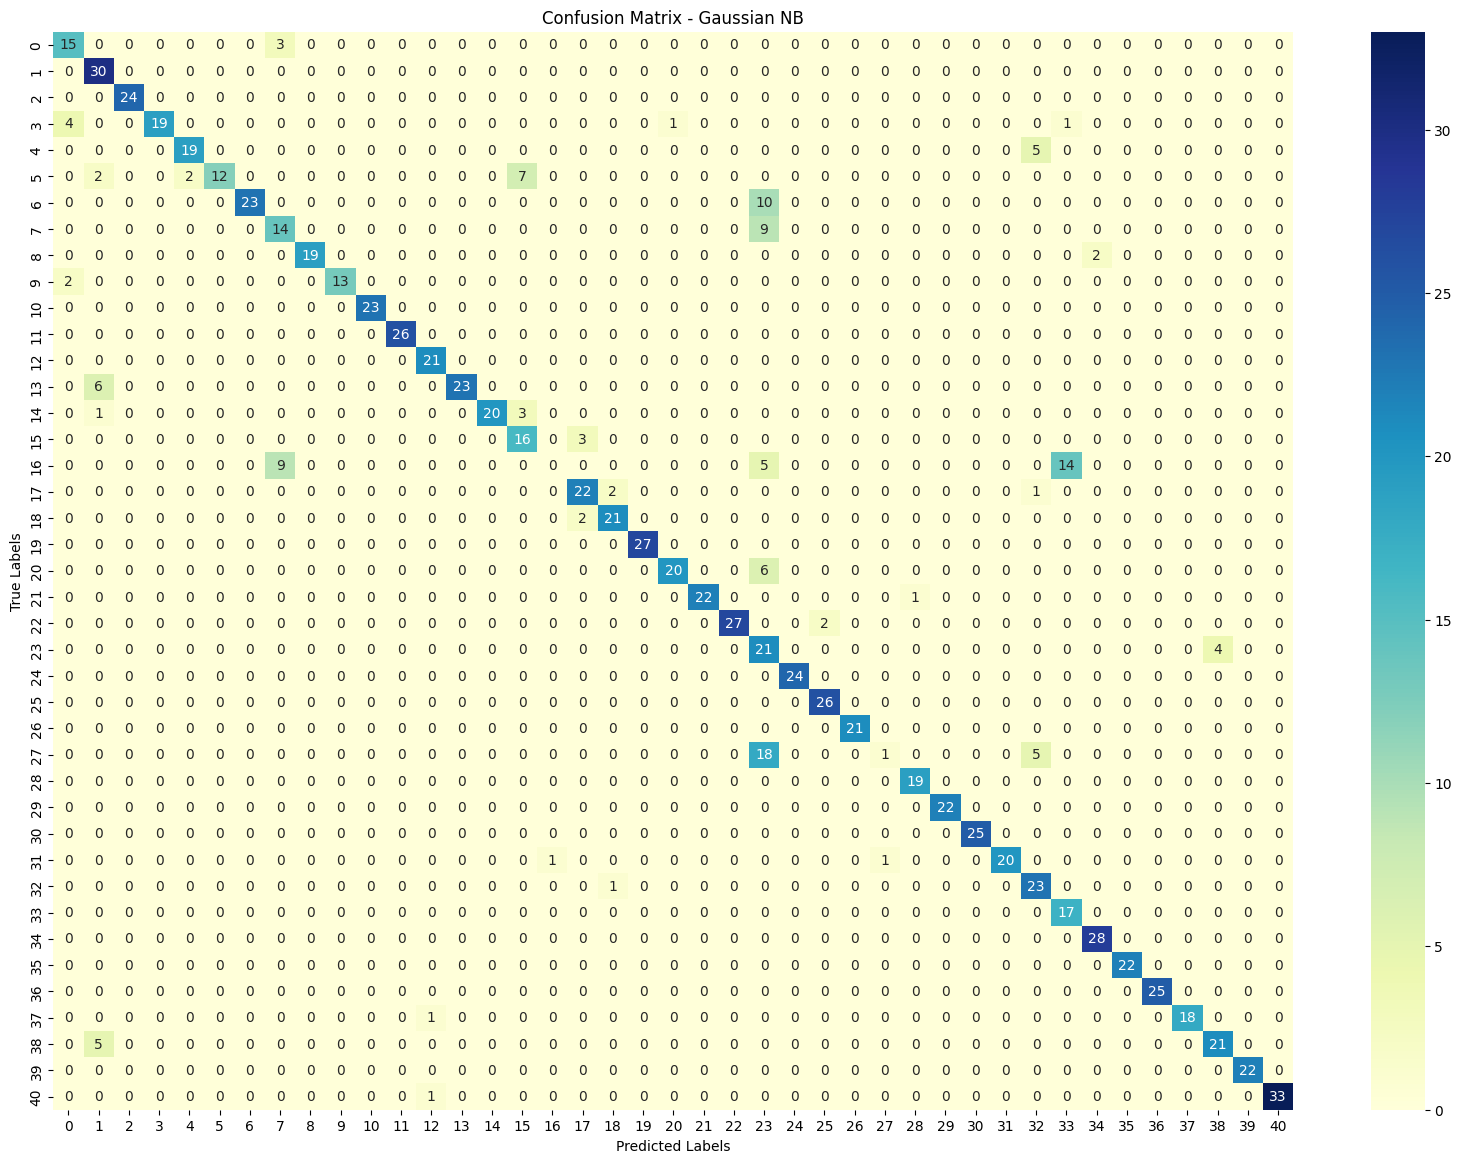

In [143]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix - Gaussian NB')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



# Multinomial Naive Bayes

In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Scale the data to ensure non-negativity
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Multinomial Naive Bayes model
MNB_classifier = MultinomialNB()
MNB_classifier.fit(X_train_scaled, Y_train)

# Predict labels on the scaled testing data
Y_pred = MNB_classifier.predict(X_test_scaled)


# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Display the metrics
print("Multinomial NB")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred, normalize=False))
print("Confusion matrix")
print(conf_matrix)

Multinomial NB
Accuracy: 0.6117886178861789
Precision: 0.625328159904573
Recall: 0.6178727639069008
F1-Score: 0.5957437011467955
602
Confusion matrix
[[15  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  5  0 ... 21  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 33]]


In [145]:
## Comparative Analysis

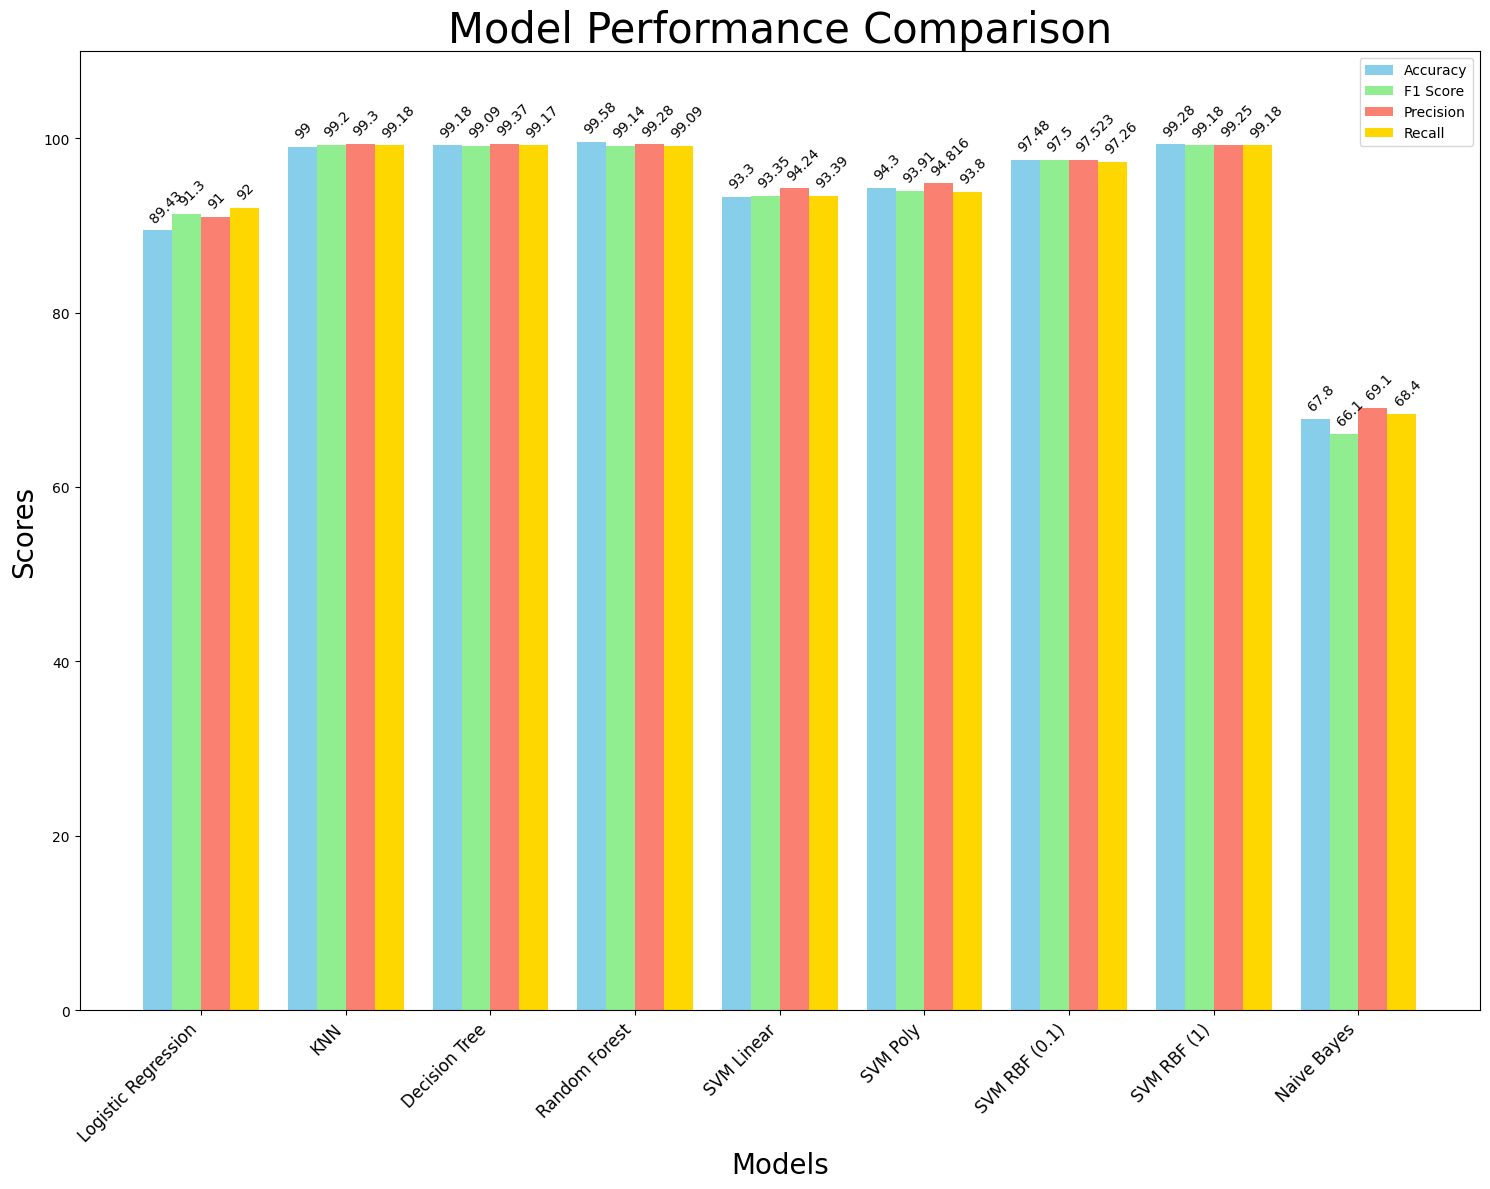

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = [
    "Logistic Regression", "KNN", "Decision Tree",
    "Random Forest", "SVM Linear", "SVM Poly",
    "SVM RBF (0.1)", "SVM RBF (1)", "Naive Bayes"
]

# Sample metrics for each model
accuracies = [89.43, 99, 99.18, 99.58, 93.3, 94.3, 97.48, 99.28, 67.8]
f1_scores = [91.3, 99.2, 99.09, 99.14, 93.35, 93.91, 97.5, 99.18, 66.1]
precisions = [91, 99.3, 99.37, 99.28, 94.24, 94.816, 97.523, 99.25, 69.1]
recalls = [92, 99.18, 99.17, 99.09, 93.39, 93.8, 97.26, 99.18, 68.4]

# Number of models
num_models = len(models)

bar_width = 0.2
index = np.arange(num_models)

# Define colors for each metric
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

plt.figure(figsize=(15,12))

# Plotting all metrics for each model
for i, (metric, color) in enumerate(zip([accuracies, f1_scores, precisions, recalls], colors)):
    plt.bar(index + i * bar_width, metric, bar_width, label=['Accuracy', 'F1 Score', 'Precision', 'Recall'][i], color=color)

plt.xlabel('Models',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Model Performance Comparison',fontsize=30)
plt.xticks(index + 1.5 * bar_width, models, rotation=45, ha='right', fontsize=12)
plt.legend()

# Set y-axis limits
plt.ylim(0, 110)  # You can adjust the upper limit to accommodate the maximum value in your data

# Adding value labels on top of each bar
for i in range(num_models):
    for j, metric in enumerate([accuracies, f1_scores, precisions, recalls]):
        plt.text(index[i] + j * bar_width - 0.07, metric[i] + 1, str(metric[i]), rotation=45)

plt.tight_layout()
plt.show()

Among all the models, we gained the highest accuracy for the Random Forest model of 99.58 %.

The SVM and KNN models were also very close.

 However, the suggested model, that is Random forest model, yields the most accurate result, 99.5% as compared to earlier methods.
